# Popular 10000 movies listed on TMDb

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from sklearn.preprocessing import LabelEncoder

from scipy import stats

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
cast_df = pd.read_csv('../data/popular_10000_movies/cast_dataset.csv', index_col='id')
crew_df = pd.read_csv('../data/popular_10000_movies/crew_dataset.csv', index_col='id')
keywords_df = pd.read_csv('../data/popular_10000_movies/keywords_dataframe.csv', index_col='id')
mov_df = pd.read_csv('../data/popular_10000_movies/movies_dataset.csv', index_col='id')

keywords_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
movies_df = mov_df.merge(cast_df, on='id').merge(crew_df, on ='id').merge(keywords_df, on ='id')
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [4]:
movies_df.head()

,genre_ids,original_language,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,,
385687,"[28, 80, 53]",en,Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",en,Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]",en,"With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]",en,"While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [5]:
movies_df.shape

(10652, 12)

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 385687 to 465109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          10652 non-null  object        
 1   original_language  10652 non-null  object        
 2   overview           10649 non-null  object        
 3   popularity         10652 non-null  float64       
 4   release_date       10636 non-null  datetime64[ns]
 5   title              10652 non-null  object        
 6   vote_average       10652 non-null  float64       
 7   vote_count         10652 non-null  int64         
 8   genres             10634 non-null  object        
 9   cast               10652 non-null  object        
 10  crew               10652 non-null  object        
 11  keywords           10652 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 749.0+ KB


## Data cleaning

In [7]:
movies_df['original_language'].value_counts()

en    10652
Name: original_language, dtype: int64

In [8]:
movies_df.drop('original_language', axis=1, inplace=True)

In [9]:
no_keywords_ids = movies_df[movies_df['keywords']=='[]'].index
duplicated = movies_df[movies_df.duplicated(['overview'])].index

In [10]:
no_keywords_ids

Int64Index([1074034, 1115710, 1073140, 1094319, 1016121,  893345,  993867,
            1070777,   44918, 1129956,
            ...
             767499,  430682,   37527,  718100,   54648,  538604,  560362,
             987337,  653746,  583081],
           dtype='int64', name='id', length=782)

In [11]:
np.intersect1d(no_keywords_ids, duplicated)

array([144204, 538207, 661286, 724989, 892153], dtype=int64)

In [12]:
movies_df.drop_duplicates(['overview'], inplace=True)

In [13]:
movies_df.drop(movies_df[movies_df['keywords']=='[]'].index, axis=0, inplace=True)

In [14]:
movies_df.isnull().sum()

genre_ids        0
overview         0
popularity       0
release_date    10
title            0
vote_average     0
vote_count       0
genres           2
cast             0
crew             0
keywords         0
dtype: int64

In [15]:
movies_df.dropna(axis=0, inplace=True)

In [16]:
keywords_df.drop(keywords_df[keywords_df['keywords']=='[]'].index, axis=0, inplace=True)

In [17]:
keyword_l = keywords_df.loc[640146]

In [18]:
keyword_l[0]

"[{'id': 1701, 'name': 'hero'}, {'id': 3126, 'name': 'ant'}, {'id': 9663, 'name': 'sequel'}, {'id': 9715, 'name': 'superhero'}, {'id': 9717, 'name': 'based on comic'}, {'id': 18035, 'name': 'family'}, {'id': 155030, 'name': 'superhero team'}, {'id': 179430, 'name': 'aftercreditsstinger'}, {'id': 179431, 'name': 'duringcreditsstinger'}, {'id': 180547, 'name': 'marvel cinematic universe (mcu)'}]"

In [19]:
movies_df.drop(movies_df[movies_df['vote_average']==0].index, axis=0, inplace=True)

In [20]:
movies_df

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."
...,...,...,...,...,...,...,...,...,...,...,...
15017,"[35, 10749]",A young professional woman (Simpson) unwitting...,11.077,2007-12-21,Blonde Ambition,4.6,97,"Comedy, Romance","[{'cast_id': 52052, 'name': 'Jessica Simpson',...","[{'crew_id': 7413, 'name': 'Mark Irwin', 'depa...","[{'id': 6593, 'name': 'stripper'}, {'id': 9713..."
79509,"[28, 53, 35]",Josh meets a young woman who shortly afterward...,11.076,1990-03-22,The Ambulance,5.9,85,"Action, Thriller, Comedy","[{'cast_id': 21315, 'name': 'Eric Roberts', 'c...","[{'crew_id': 13670, 'name': 'Jacques Haitkin',...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
13370,"[35, 10402]",Director Christopher Guest reunites the team f...,11.075,2003-04-16,A Mighty Wind,6.8,206,"Comedy, Music","[{'cast_id': 12438, 'name': 'Bob Balaban', 'ch...","[{'crew_id': 3032, 'name': 'Robert Leighton', ...","[{'id': 11800, 'name': 'mockumentary'}, {'id':..."


## EDA

In [21]:
movies_df.groupby('genres').mean().sort_values(['vote_average'], ascending=False)

,popularity,vote_average,vote_count
genres,,,
"Family, Comedy, Mystery, Animation",10.122,8.6,82.0
"Adventure, Animation, Comedy, Fantasy, Mystery",12.090,8.5,21.0
"Fantasy, Drama, Crime",69.123,8.5,15537.0
"Animation, Family, Fantasy, Adventure, Comedy",502.086,8.3,5832.0
"Family, Animation, Drama",97.326,8.3,16649.0
...,...,...,...
"Horror, Action, Comedy, Science Fiction, Adventure",11.146,3.9,1436.0
"Fantasy, Science Fiction, Family, TV Movie",15.379,3.3,408.0
"Science Fiction, Horror, Action, Thriller",13.295,2.9,117.0


In [22]:
movies_df.groupby('genres').count().sort_values(['vote_average'], ascending=False).head(20)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
Drama,447,447,447,447,447,447,447,447,447,447
Comedy,375,375,375,375,375,375,375,375,375,375
"Comedy, Romance",231,231,231,231,231,231,231,231,231,231
"Drama, Romance",228,228,228,228,228,228,228,228,228,228
"Horror, Thriller",190,190,190,190,190,190,190,190,190,190
"Comedy, Drama",183,183,183,183,183,183,183,183,183,183
Horror,165,165,165,165,165,165,165,165,165,165
"Comedy, Drama, Romance",151,151,151,151,151,151,151,151,151,151
"Drama, Thriller",107,107,107,107,107,107,107,107,107,107


In [23]:
movies_df.groupby('genres').count().sort_values(['vote_average'], ascending=False).head(20).index

Index(['Drama', 'Comedy', 'Comedy, Romance', 'Drama, Romance',
       'Horror, Thriller', 'Comedy, Drama', 'Horror', 'Comedy, Drama, Romance',
       'Drama, Thriller', 'Drama, History', 'Action, Thriller', 'Documentary',
       'Crime, Drama, Thriller', 'Romance, Comedy', 'Action, Crime, Thriller',
       'Comedy, Crime', 'Thriller', 'Crime, Drama',
       'Horror, Mystery, Thriller', 'Romance, Drama'],
      dtype='object', name='genres')

In [24]:
movies_df.groupby('genres').count().sort_values(['vote_average'], ascending=False).tail(20)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
"Drama, Fantasy, Horror, Mystery",1,1,1,1,1,1,1,1,1,1
"Action, Western",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Family",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Comedy, TV Movie",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Comedy",1,1,1,1,1,1,1,1,1,1
"Drama, Fantasy, Adventure",1,1,1,1,1,1,1,1,1,1
"Drama, Family, Western",1,1,1,1,1,1,1,1,1,1
"Drama, Family, TV Movie, Comedy",1,1,1,1,1,1,1,1,1,1
"Drama, Family, TV Movie",1,1,1,1,1,1,1,1,1,1


In [25]:
movies_df[movies_df['genres']=='Horror'].sort_values(['vote_average'], ascending=False).head(10)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
9552,[27],12-year-old Regan MacNeil begins to adapt an e...,54.916,1973-12-26,The Exorcist,7.7,7037,Horror,"[{'cast_id': 9560, 'name': 'Ellen Burstyn', 'c...","[{'crew_id': 949, 'name': 'Louis DiGiaimo', 'd...","[{'id': 2626, 'name': 'exorcism'}, {'id': 3649..."
10331,[27],A disparate group of individuals takes refuge ...,21.106,1968-10-04,Night of the Living Dead,7.6,2122,Horror,"[{'cast_id': 97913, 'name': ""Judith O'Dea"", 'c...","[{'crew_id': 14999, 'name': 'George A. Romero'...","[{'id': 380, 'name': 'sibling relationship'}, ..."
571,[27],Chic socialite Melanie Daniels enjoys a passin...,20.856,1963-03-28,The Birds,7.5,3586,Horror,"[{'cast_id': 6929, 'name': 'Tippi Hedren', 'ch...","[{'crew_id': 1045, 'name': 'Bernard Herrmann',...","[{'id': 2589, 'name': 'pet shop'}, {'id': 3556..."
923,[27],During an ever-growing epidemic of zombies tha...,26.619,1978-09-02,Dawn of the Dead,7.5,1816,Horror,"[{'cast_id': 15069, 'name': 'David Emge', 'cha...","[{'crew_id': 14999, 'name': 'George A. Romero'...","[{'id': 720, 'name': 'helicopter'}, {'id': 343..."
949423,[27],"Trapped on her family’s isolated farm, Pearl m...",53.379,2022-09-16,Pearl,7.4,806,Horror,"[{'cast_id': 1137824, 'name': 'Mia Goth', 'cha...","[{'crew_id': 15221, 'name': 'Tyler Bates', 'de...","[{'id': 445, 'name': 'pornography'}, {'id': 71..."
16307,[27],Police sergeant Neil Howie is called to an isl...,18.861,1973-12-01,The Wicker Man,7.4,1135,Horror,"[{'cast_id': 39188, 'name': 'Edward Woodward',...","[{'crew_id': 750, 'name': 'Maggie Cartier', 'd...","[{'id': 388, 'name': 'scotland'}, {'id': 818, ..."
764,[27],Five vacationing college students unwittingly ...,43.335,1981-09-10,The Evil Dead,7.3,3462,Horror,"[{'cast_id': 11357, 'name': 'Bruce Campbell', ...","[{'crew_id': 1223, 'name': 'Joel Coen', 'depar...","[{'id': 769, 'name': 'falsely accused'}, {'id'..."
30497,[27],When Sally hears that her grandfather's grave ...,27.673,1974-10-01,The Texas Chain Saw Massacre,7.3,2770,Horror,"[{'cast_id': 27798, 'name': 'Marilyn Burns', '...","[{'crew_id': 16296, 'name': 'Ronald M. Bozman'...","[{'id': 625, 'name': 'sadistic'}, {'id': 1420,..."
11868,[27],After Jonathan Harker attacks Dracula at his c...,14.505,1958-05-22,Dracula,7.3,501,Horror,"[{'cast_id': 5, 'name': 'Peter Cushing', 'char...","[{'crew_id': 1544, 'name': 'Bram Stoker', 'dep...","[{'id': 818, 'name': 'based on novel or book'}..."


In [26]:
movies_df[movies_df['genres']=='Thriller'].sort_values(['vote_average'], ascending=False).head(10)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
985939,[53],"For best friends Becky and Hunter, life is all...",198.173,2022-08-11,Fall,7.3,2977,Thriller,"[{'cast_id': 54633, 'name': 'Grace Caroline Cu...","[{'crew_id': 65814, 'name': 'Barry Brooker', '...","[{'id': 209439, 'name': 'sport climbing'}]"
6145,[53],A husband is on trial for the attempted murder...,22.980,2007-04-19,Fracture,7.3,3533,Thriller,"[{'cast_id': 4173, 'name': 'Anthony Hopkins', ...","[{'crew_id': 3965, 'name': 'Deborah Aquila', '...","[{'id': 584, 'name': 'perfect crime'}, {'id': ..."
10518,[53],A graduate student and obsessive runner in New...,15.151,1976-10-08,Marathon Man,7.2,909,Thriller,"[{'cast_id': 4483, 'name': 'Dustin Hoffman', '...","[{'crew_id': 8217, 'name': 'Conrad L. Hall', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
9812,[53],A former Los Angeles drug dealer moves far awa...,12.373,1998-09-25,Thursday,7.0,269,Thriller,"[{'cast_id': 11155, 'name': 'Thomas Jane', 'ch...","[{'crew_id': 22120, 'name': 'Chris Anthony Mil...","[{'id': 2231, 'name': 'drug dealer'}, {'id': 1..."
597208,[53],An ambitious carnival man with a talent for ma...,34.594,2021-12-02,Nightmare Alley,7.0,2426,Thriller,"[{'cast_id': 51329, 'name': 'Bradley Cooper', ...","[{'crew_id': 8365, 'name': 'Dana Jones', 'depa...","[{'id': 128, 'name': 'love triangle'}, {'id': ..."
192141,[53],"In their new overseas home, an American family...",24.922,2015-08-26,No Escape,6.9,2304,Thriller,"[{'cast_id': 887, 'name': 'Owen Wilson', 'char...","[{'crew_id': 7229, 'name': 'Marco Beltrami', '...","[{'id': 612, 'name': 'hotel'}, {'id': 2020, 'n..."
10083,[53],"Navy Lt. Tom Farrell meets a young woman, Susa...",13.093,1987-08-14,No Way Out,6.9,566,Thriller,"[{'cast_id': 1269, 'name': 'Kevin Costner', 'c...","[{'crew_id': 2122, 'name': 'William Hoy', 'dep...","[{'id': 1849, 'name': 'homicide'}, {'id': 2314..."
308032,[53],This film is based on the actual events that t...,15.512,2015-07-17,The Stanford Prison Experiment,6.9,849,Thriller,"[{'cast_id': 8289, 'name': 'Billy Crudup', 'ch...","[{'crew_id': 23786, 'name': 'Nacoma Whobrey', ...","[{'id': 378, 'name': 'prison'}, {'id': 1228, '..."
928270,[53],A woman's life takes an unexpected turn when s...,36.647,2022-01-17,Heatwave,6.9,93,Thriller,"[{'cast_id': 159962, 'name': 'Kat Graham', 'ch...","[{'crew_id': 5917, 'name': 'Ernie Barbarash', ...","[{'id': 4480, 'name': 'businessman'}, {'id': 5..."


In [27]:
movies_df[movies_df['genres']=='Drama'].sort_values(['vote_average'], ascending=False).head(10)

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
389,[18],The defense and the prosecution have rested an...,44.553,1957-04-10,12 Angry Men,8.5,7360,Drama,"[{'cast_id': 1936, 'name': 'Martin Balsam', 'c...","[{'crew_id': 4958, 'name': 'Henry Fonda', 'dep...","[{'id': 934, 'name': 'judge'}, {'id': 1417, 'n..."
73,[18],Derek Vineyard is paroled after serving 3 year...,25.431,1998-07-01,American History X,8.4,10468,Drama,"[{'cast_id': 819, 'name': 'Edward Norton', 'ch...","[{'crew_id': 29, 'name': 'Steve Tisch', 'depar...","[{'id': 376, 'name': 'neo-nazism'}, {'id': 378..."
599,[18],A hack screenwriter writes a screenplay for a ...,16.691,1950-08-10,Sunset Boulevard,8.4,2248,Drama,"[{'cast_id': 8252, 'name': 'William Holden', '...","[{'crew_id': 8619, 'name': 'Franz Waxman', 'de...","[{'id': 613, 'name': ""new year's eve""}, {'id':..."
510,[18],A petty criminal fakes insanity to serve his s...,48.315,1975-11-19,One Flew Over the Cuckoo's Nest,8.4,9443,Drama,"[{'cast_id': 514, 'name': 'Jack Nicholson', 'c...","[{'crew_id': 597, 'name': 'Jane Feinberg', 'de...","[{'id': 428, 'name': 'nurse'}, {'id': 791, 'na..."
207,[18],"At an elite, old-fashioned boarding school in ...",36.505,1989-06-02,Dead Poets Society,8.3,10052,Drama,"[{'cast_id': 2157, 'name': 'Robin Williams', '...","[{'crew_id': 1530, 'name': 'Howard Feuer', 'de...","[{'id': 30, 'name': 'individual'}, {'id': 490,..."
50014,[18],Aibileen Clark is a middle-aged African-Americ...,77.737,2011-08-09,The Help,8.2,7354,Drama,"[{'cast_id': 54693, 'name': 'Emma Stone', 'cha...","[{'crew_id': 153, 'name': 'Thomas Newman', 'de...","[{'id': 787, 'name': 'mississippi river'}, {'i..."
600354,[18],A man refuses all assistance from his daughter...,23.661,2020-12-23,The Father,8.2,2671,Drama,"[{'cast_id': 4173, 'name': 'Anthony Hopkins', ...","[{'crew_id': 10908, 'name': 'Peter Francis', '...","[{'id': 212, 'name': 'london, england'}, {'id'..."
458220,[18],"After 12 years in prison, former high school f...",79.574,2021-01-29,Palmer,8.1,1179,Drama,"[{'cast_id': 12111, 'name': 'Justin Timberlake...","[{'crew_id': 5328, 'name': 'Kerry Barden', 'de...","[{'id': 1013, 'name': 'homophobia'}, {'id': 14..."
655,[18],A man wanders out of the desert not knowing wh...,24.872,1984-08-23,"Paris, Texas",8.1,1488,Drama,"[{'cast_id': 5048, 'name': 'Harry Dean Stanton...","[{'crew_id': 3110, 'name': 'Allison Anders', '...","[{'id': 380, 'name': 'sibling relationship'}, ..."


In [28]:
most_vote_average = movies_df[movies_df['vote_count']>100].sort_values(['vote_average'], ascending=False).head(20)
most_popularity = movies_df.sort_values(['popularity'], ascending=False).head(20)

In [29]:
most_df = pd.concat([most_vote_average, most_popularity])
most_df

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
373558,"[10402, 99]","Filmed in front of 76,000 fans at the ANZ Stad...",15.562,2015-12-20,Taylor Swift: The 1989 World Tour - Live,8.7,119,"Music, Documentary","[{'cast_id': 212208, 'name': 'Taylor Swift', '...","[{'crew_id': 71329, 'name': 'Jonas Åkerlund', ...","[{'id': 1740, 'name': 'pop culture'}, {'id': 2..."
238,"[18, 80]","Spanning the years 1945 to 1955, a chronicle o...",120.966,1972-03-14,The Godfather,8.7,18141,"Drama, Crime","[{'cast_id': 3084, 'name': 'Marlon Brando', 'c...","[{'crew_id': 154, 'name': 'Walter Murch', 'dep...","[{'id': 131, 'name': 'italy'}, {'id': 697, 'na..."
278,"[18, 80]",Framed in the 1940s for the double murder of h...,107.982,1994-09-23,The Shawshank Redemption,8.7,24021,"Drama, Crime","[{'cast_id': 504, 'name': 'Tim Robbins', 'char...","[{'crew_id': 153, 'name': 'Thomas Newman', 'de...","[{'id': 378, 'name': 'prison'}, {'id': 417, 'n..."
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
240,"[18, 80]",In the continuing saga of the Corleone crime f...,68.191,1974-12-20,The Godfather Part II,8.6,10949,"Drama, Crime","[{'cast_id': 1158, 'name': 'Al Pacino', 'chara...","[{'crew_id': 154, 'name': 'Walter Murch', 'dep...","[{'id': 131, 'name': 'italy'}, {'id': 700, 'na..."
424,"[18, 36, 10752]",The true story of how businessman Oskar Schind...,60.506,1993-12-15,Schindler's List,8.6,14198,"Drama, History, War","[{'cast_id': 3896, 'name': 'Liam Neeson', 'cha...","[{'crew_id': 491, 'name': 'John Williams', 'de...","[{'id': 818, 'name': 'based on novel or book'}..."
770156,"[10751, 18]",Second chances start when a hardened criminal ...,21.416,2020-10-19,Lucy Shimmers And The Prince Of Peace,8.5,131,"Family, Drama","[{'cast_id': 2643437, 'name': 'Scarlett Diamon...","[{'crew_id': 222497, 'name': 'Rob Diamond', 'd...","[{'id': 3071, 'name': 'prince'}, {'id': 6057, ..."
76115,"[10402, 18, 10749]","A disfigured musical genius, hidden away in th...",13.290,2011-09-27,The Phantom of the Opera at the Royal Albert Hall,8.5,143,"Music, Drama, Romance","[{'cast_id': 145115, 'name': 'Ramin Karimloo',...","[{'crew_id': 14474, 'name': 'Gaston Leroux', '...","[{'id': 4344, 'name': 'musical'}]"
13,"[35, 18, 10749]",A man with a low IQ has accomplished great thi...,73.135,1994-06-23,Forrest Gump,8.5,24853,"Comedy, Drama, Romance","[{'cast_id': 31, 'name': 'Tom Hanks', 'charact...","[{'crew_id': 37, 'name': 'Alan Silvestri', 'de...","[{'id': 422, 'name': 'vietnam veteran'}, {'id'..."


In [30]:
most_df[most_df.duplicated()]

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."


In [31]:
movies_df.groupby('release_date').count()

,genre_ids,overview,popularity,title,vote_average,vote_count,genres,cast,crew,keywords
release_date,,,,,,,,,,
1903-12-07,1,1,1,1,1,1,1,1,1,1
1915-02-08,1,1,1,1,1,1,1,1,1,1
1916-09-04,1,1,1,1,1,1,1,1,1,1
1921-01-21,1,1,1,1,1,1,1,1,1,1
1924-04-17,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2023-06-22,1,1,1,1,1,1,1,1,1,1
2023-06-23,4,4,4,4,4,4,4,4,4,4
2023-06-27,1,1,1,1,1,1,1,1,1,1


In [32]:
date_index = movies_df.copy()
date_index.reset_index(inplace=True)
# date_index.drop('id', axis=1, inplace=True)
date_index.set_index(['release_date'], inplace=True)

In [33]:
date_index.head()

,id,genre_ids,overview,popularity,title,vote_average,vote_count,genres,cast,crew,keywords
release_date,,,,,,,,,,,
2023-05-17,385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
2023-06-09,697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
2023-03-22,603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
2023-05-31,569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
2023-04-05,502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [34]:
date_index.resample('1Y').count()

,id,genre_ids,overview,popularity,title,vote_average,vote_count,genres,cast,crew,keywords
release_date,,,,,,,,,,,
1903-12-31,1,1,1,1,1,1,1,1,1,1,1
1904-12-31,0,0,0,0,0,0,0,0,0,0,0
1905-12-31,0,0,0,0,0,0,0,0,0,0,0
1906-12-31,0,0,0,0,0,0,0,0,0,0,0
1907-12-31,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,348,348,348,348,348,348,348,348,348,348,348
2020-12-31,299,299,299,299,299,299,299,299,299,299,299
2021-12-31,333,333,333,333,333,333,333,333,333,333,333


## Visualization

<AxesSubplot:xlabel='popularity', ylabel='title'>

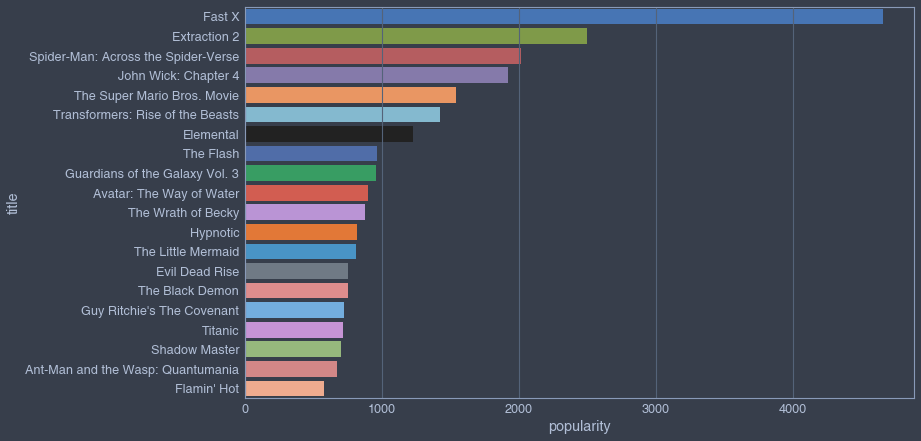

In [47]:
top_popularity = movies_df.sort_values(['popularity'], ascending=False).head(20)
sns.barplot(data=top_popularity, x='popularity', y='title')

<AxesSubplot:xlabel='popularity', ylabel='title'>

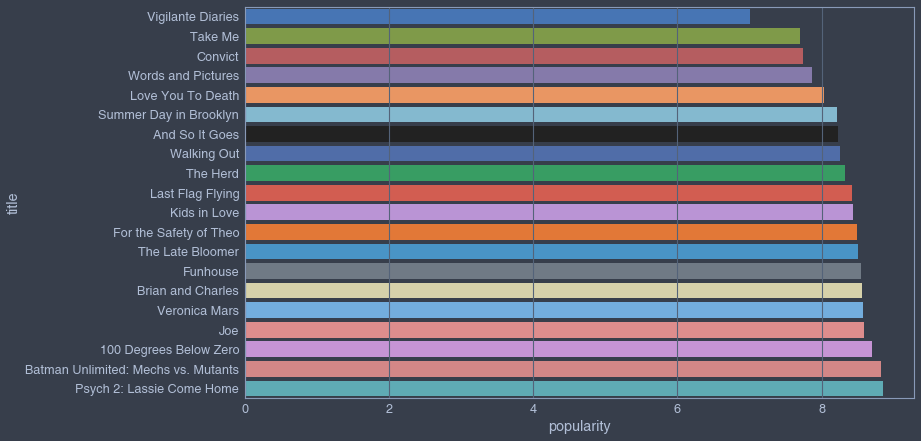

In [72]:
bottom_popularity = movies_df[movies_df['popularity']!=0].sort_values(['popularity'], ascending=True).head(20)
sns.barplot(data=bottom_popularity, x='popularity', y='title')

<AxesSubplot:xlabel='vote_average', ylabel='title'>

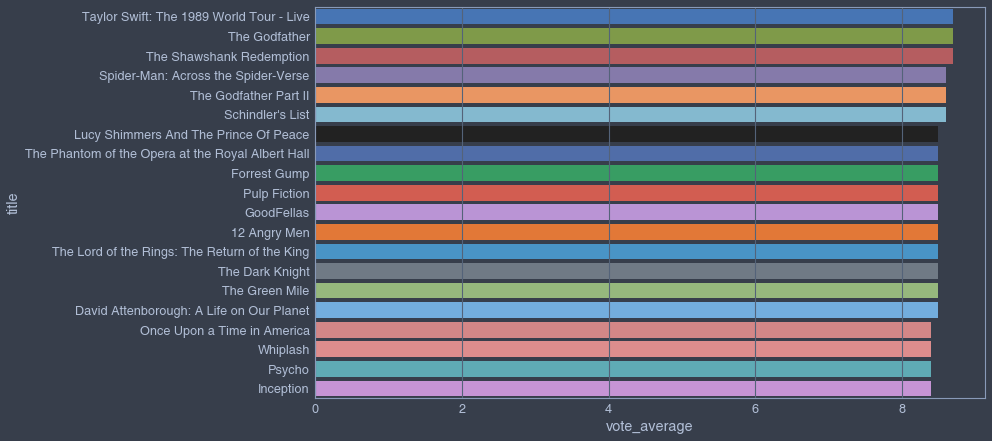

In [31]:
top_vote = movies_df[movies_df['vote_count']>100].sort_values(['vote_average'], ascending=False).head(20)
sns.barplot(data=top_vote, x='vote_average', y='title')

<AxesSubplot:xlabel='vote_average', ylabel='title'>

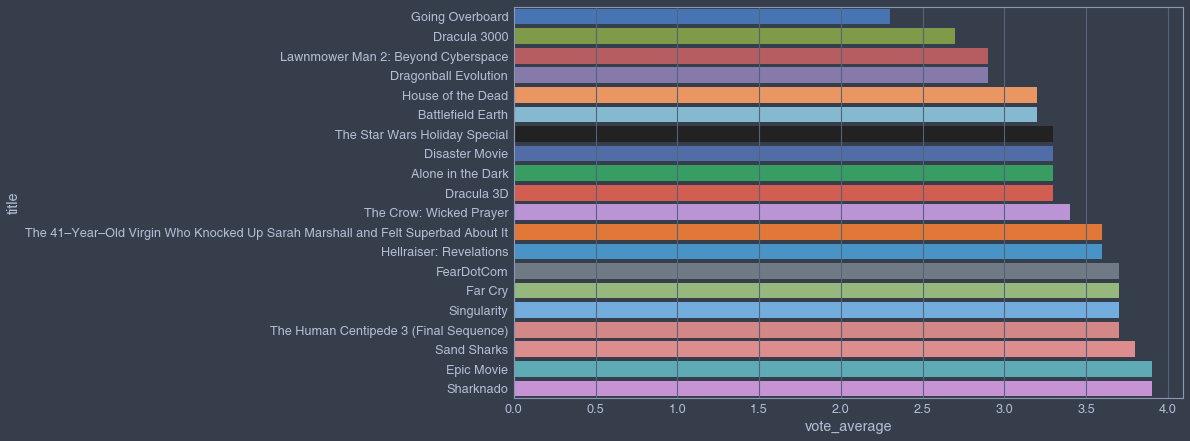

In [33]:
bottom_vote = movies_df[(movies_df['vote_average']!=0) & (movies_df['vote_count']>100)]\
                       .sort_values(['vote_average'], ascending=True).head(20)
sns.barplot(data=bottom_vote, x='vote_average', y='title')

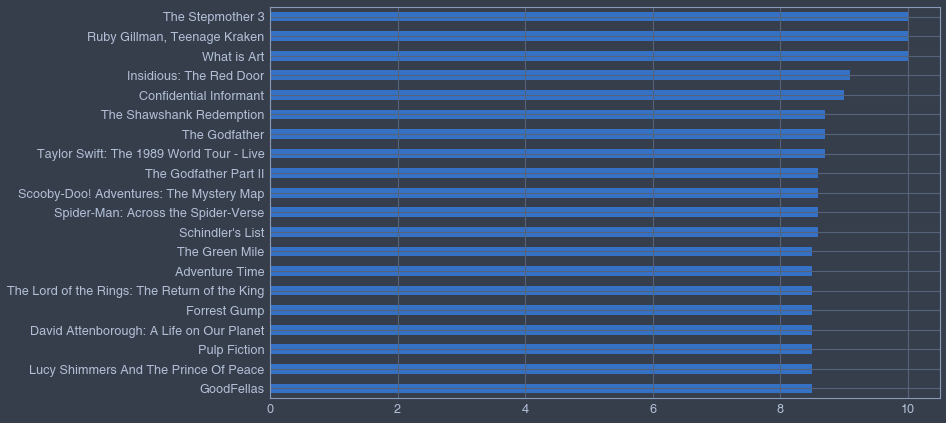

In [49]:
top_vote_2 = pd.Series(top_vote['vote_average'].to_list(), index=top_vote['title'].to_list()) 
top_vote_2.plot(kind='barh').invert_yaxis()

In [63]:
movies_df

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."
...,...,...,...,...,...,...,...,...,...,...,...
15017,"[35, 10749]",A young professional woman (Simpson) unwitting...,11.077,2007-12-21,Blonde Ambition,4.6,97,"Comedy, Romance","[{'cast_id': 52052, 'name': 'Jessica Simpson',...","[{'crew_id': 7413, 'name': 'Mark Irwin', 'depa...","[{'id': 6593, 'name': 'stripper'}, {'id': 9713..."
79509,"[28, 53, 35]",Josh meets a young woman who shortly afterward...,11.076,1990-03-22,The Ambulance,5.9,85,"Action, Thriller, Comedy","[{'cast_id': 21315, 'name': 'Eric Roberts', 'c...","[{'crew_id': 13670, 'name': 'Jacques Haitkin',...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
13370,"[35, 10402]",Director Christopher Guest reunites the team f...,11.075,2003-04-16,A Mighty Wind,6.8,206,"Comedy, Music","[{'cast_id': 12438, 'name': 'Bob Balaban', 'ch...","[{'crew_id': 3032, 'name': 'Robert Leighton', ...","[{'id': 11800, 'name': 'mockumentary'}, {'id':..."


Text(0, 0.5, 'Popularity')

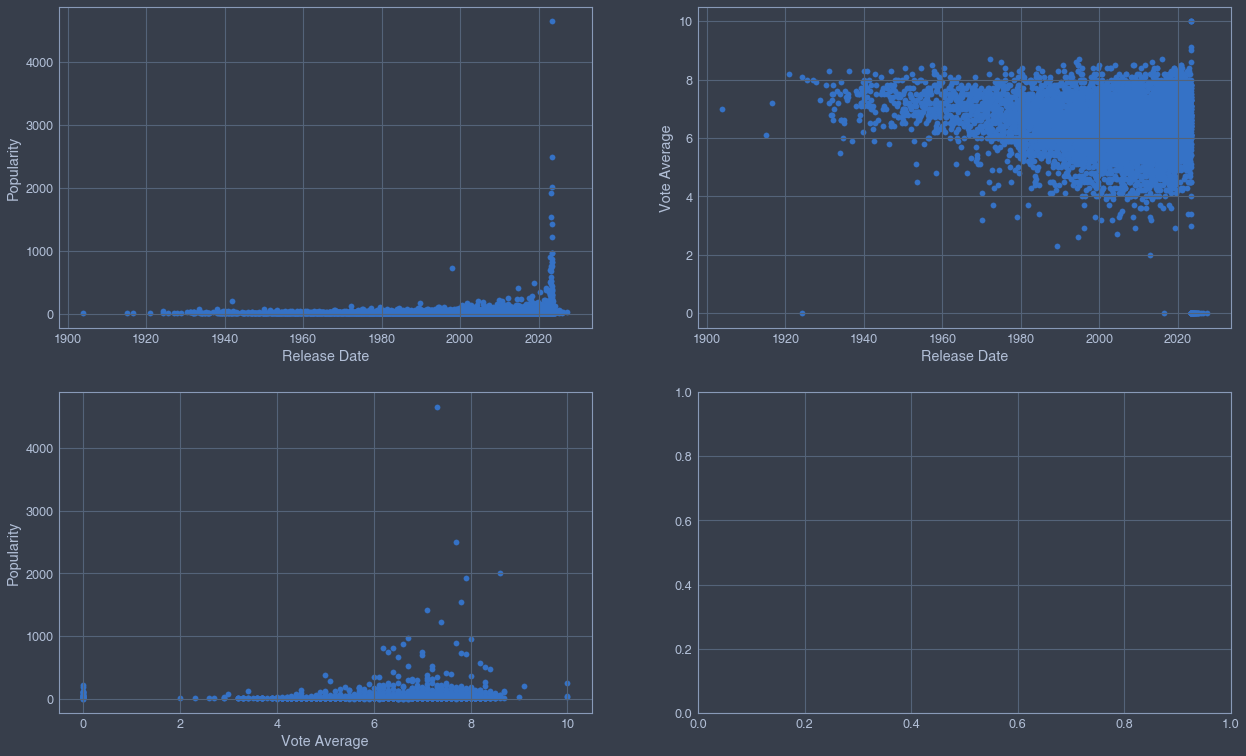

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(21, 13))

axs[0, 0].scatter(movies_df['release_date'], movies_df['popularity'])
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Popularity')

axs[0, 1].scatter(movies_df['release_date'], movies_df['vote_average'])
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Vote Average')

axs[1, 0].scatter(movies_df['vote_average'], movies_df['popularity'])
axs[1, 0].set_xlabel('Vote Average')
axs[1, 0].set_ylabel('Popularity')

In [51]:
movies_df.groupby('release_date')['genres'].value_counts()

release_date  genres                            
1903-12-07    Crime, Action, Western                1
1915-02-08    Drama, History, War                   1
1916-09-04    Drama, History                        1
1921-01-21    Comedy, Drama                         1
1924-04-17    Action, Comedy, Mystery               1
                                                   ..
2025-04-04    Action, Crime, Thriller               1
2025-06-27    Adventure, Comedy, Family, Fantasy    1
2025-12-17    Action, Science Fiction, Adventure    1
2026-04-29    Action, Science Fiction, Adventure    1
2027-05-05    Action, Science Fiction               1
Name: genres, Length: 9143, dtype: int64

In [52]:
genres_by_date = movies_df.groupby('release_date')['genres'].value_counts()

In [53]:
genres_by_date = genres_by_date.to_frame()

In [54]:
genres_by_date = genres_by_date.rename(columns={'genres': 'genres_count'})

In [55]:
genres_by_date.reset_index(inplace=True)
genres_by_date

,release_date,genres,genres_count
0,1903-12-07,"Crime, Action, Western",1
1,1915-02-08,"Drama, History, War",1
2,1916-09-04,"Drama, History",1
3,1921-01-21,"Comedy, Drama",1
4,1924-04-17,"Action, Comedy, Mystery",1
...,...,...,...
9138,2025-04-04,"Action, Crime, Thriller",1
9139,2025-06-27,"Adventure, Comedy, Family, Fantasy",1
9140,2025-12-17,"Action, Science Fiction, Adventure",1
9141,2026-04-29,"Action, Science Fiction, Adventure",1


In [56]:
most_pop = movies_df[['release_date', 'title']]
most_pop.reset_index(inplace=True)
most_pop.drop('id', axis=1, inplace=True)

f:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
most_pop.set_index(['release_date'], inplace=True)

In [58]:
most_pop.loc['2020-1-1':'2021-1-1']

,title
release_date,
2020-04-24,Extraction
2020-09-02,After We Collided
2020-04-12,Mortal Kombat Legends: Scorpion's Revenge
2020-02-19,The Call of the Wild
2020-08-26,Making The Witcher
...,...
2020-10-15,Stay Out of the Attic
2020-09-24,Two by Two: Overboard!
2020-11-13,Too Close for Christmas


Text(0, 0.5, 'Unpopular Genres')

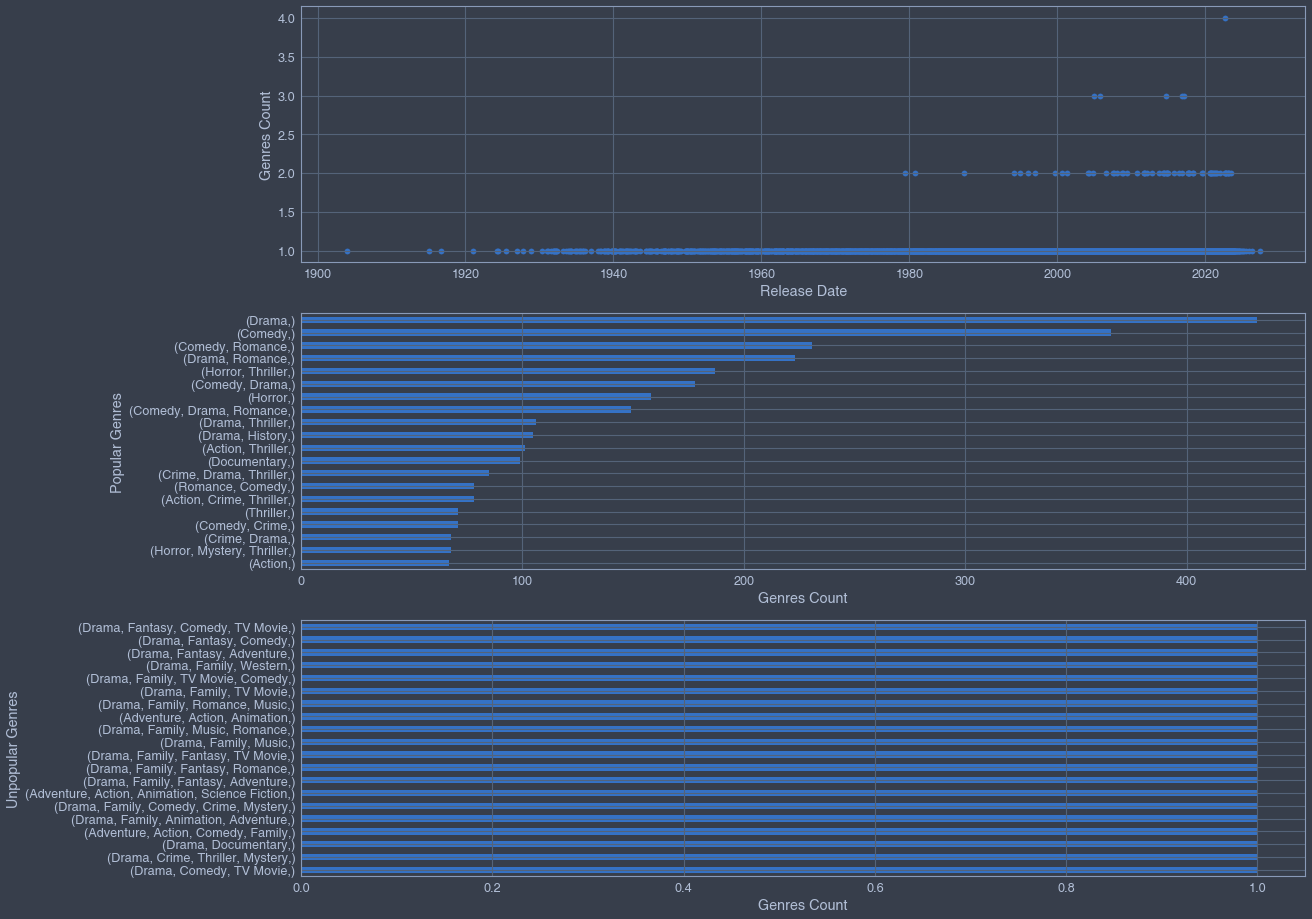

In [69]:
fig, axs = plt.subplots(3, 1, figsize=(18, 16))

axs[0].scatter(genres_by_date['release_date'], genres_by_date['genres_count'])
axs[0].set_xlabel('Release Date')
axs[0].set_ylabel('Genres Count')

genres_by_date.value_counts(['genres']).head(20).plot(kind='barh', x='genres', y='count', ax=axs[1]).invert_yaxis()
axs[1].set_xlabel('Genres Count')
axs[1].set_ylabel('Popular Genres')

genres_by_date.value_counts(['genres']).tail(20).plot(kind='barh', x='genres', y='count', ax=axs[2]).invert_yaxis()
axs[2].set_xlabel('Genres Count')
axs[2].set_ylabel('Unpopular Genres')

In [60]:
genres_by_date[genres_by_date['genres']=='Horror']

,release_date,genres,genres_count
251,1958-05-22,Horror,1
333,1963-03-28,Horror,1
344,1963-08-21,Horror,1
393,1966-01-09,Horror,1
454,1968-07-20,Horror,1
...,...,...,...
8894,2023-01-02,Horror,1
8902,2023-01-13,Horror,2
8917,2023-01-27,Horror,1
9048,2023-06-09,Horror,1


In [61]:
genres_by_date

,release_date,genres,genres_count
0,1903-12-07,"Crime, Action, Western",1
1,1915-02-08,"Drama, History, War",1
2,1916-09-04,"Drama, History",1
3,1921-01-21,"Comedy, Drama",1
4,1924-04-17,"Action, Comedy, Mystery",1
...,...,...,...
9138,2025-04-04,"Action, Crime, Thriller",1
9139,2025-06-27,"Adventure, Comedy, Family, Fantasy",1
9140,2025-12-17,"Action, Science Fiction, Adventure",1
9141,2026-04-29,"Action, Science Fiction, Adventure",1


Text(0, 0.5, 'Count')

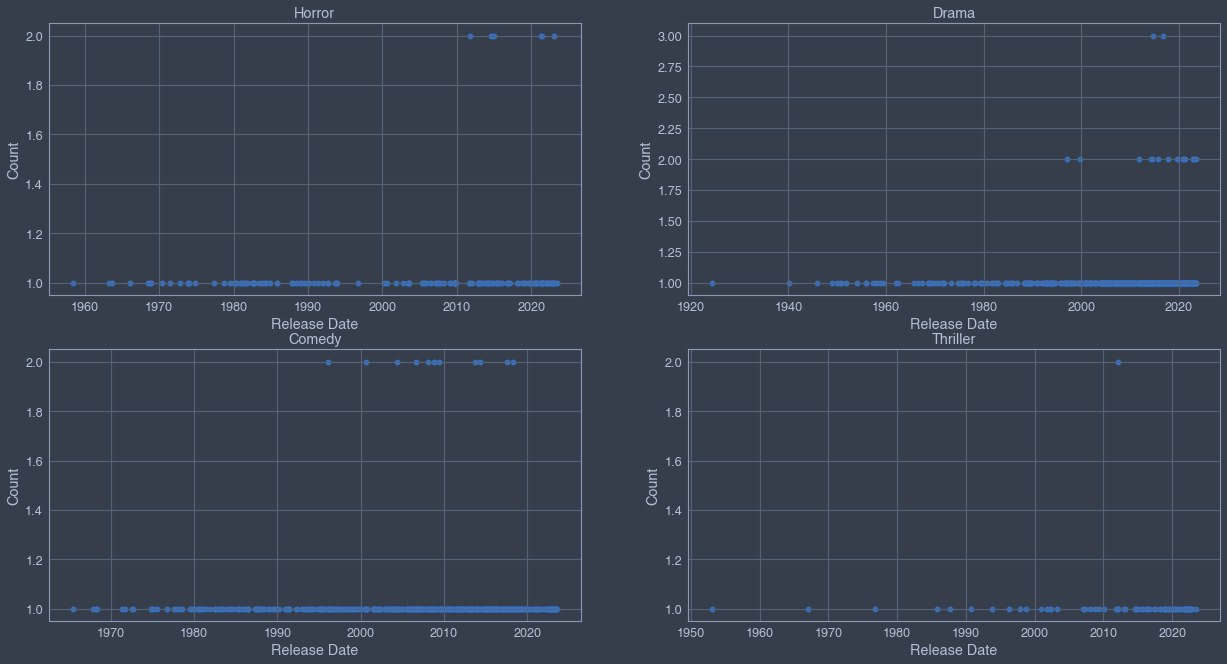

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(21, 11))

axs[0, 0].scatter(genres_by_date[genres_by_date['genres']=='Horror']['release_date'],
               genres_by_date[genres_by_date['genres']=='Horror']['genres_count'])
axs[0, 0].set_title('Horror')
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Count')

axs[0, 1].scatter(genres_by_date[genres_by_date['genres']=='Drama']['release_date'],
               genres_by_date[genres_by_date['genres']=='Drama']['genres_count'])
axs[0, 1].set_title('Drama')
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Count')

axs[1, 0].scatter(genres_by_date[genres_by_date['genres']=='Comedy']['release_date'],
               genres_by_date[genres_by_date['genres']=='Comedy']['genres_count'])
axs[1, 0].set_title('Comedy')
axs[1, 0].set_xlabel('Release Date')
axs[1, 0].set_ylabel('Count')

axs[1, 1].scatter(genres_by_date[genres_by_date['genres']=='Thriller']['release_date'],
               genres_by_date[genres_by_date['genres']=='Thriller']['genres_count'])
axs[1, 1].set_title('Thriller')
axs[1, 1].set_xlabel('Release Date')
axs[1, 1].set_ylabel('Count')

In [21]:
comedy_romance = movies_df[(movies_df['genres']=='Comedy, Romance') | (movies_df['genres']=='Romance, Comedy')]
drama_romance = movies_df[(movies_df['genres']=='Drama, Romance') | (movies_df['genres']=='Romance, Drama')]

In [23]:
comedy_romance

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
884605,"[35, 10749]","On the brink of losing her childhood home, Mad...",433.211,2023-06-15,No Hard Feelings,6.4,77,"Comedy, Romance","[{'cast_id': 72129, 'name': 'Jennifer Lawrence...","[{'crew_id': 5359, 'name': 'Mychael Danna', 'd...","[{'id': 9799, 'name': 'romantic comedy'}, {'id..."
561717,"[10749, 35]","After a high-profile firing, Jenna’s fashion c...",216.706,2023-06-23,The Perfect Find,6.4,19,"Romance, Comedy","[{'cast_id': 17773, 'name': 'Gabrielle Union',...","[{'crew_id': 17773, 'name': 'Gabrielle Union',...","[{'id': 818, 'name': 'based on novel or book'}..."
232672,"[35, 10749]",After a divorced mom and widowed dad have a di...,68.973,2014-05-21,Blended,6.9,3122,"Comedy, Romance","[{'cast_id': 19292, 'name': 'Adam Sandler', 'c...","[{'crew_id': 2593, 'name': 'Rupert Gregson-Wil...","[{'id': 409, 'name': 'africa'}, {'id': 641, 'n..."
114,"[35, 10749]",When a millionaire wheeler-dealer enters a bus...,64.533,1990-03-23,Pretty Woman,7.4,7205,"Comedy, Romance","[{'cast_id': 1205, 'name': 'Richard Gere', 'ch...","[{'crew_id': 376, 'name': 'Arnon Milchan', 'de...","[{'id': 549, 'name': 'prostitute'}, {'id': 592..."
2105,"[35, 10749]","At a high-school party, four friends find that...",56.981,1999-07-09,American Pie,6.6,7003,"Comedy, Romance","[{'cast_id': 21593, 'name': 'Jason Biggs', 'ch...","[{'crew_id': 298, 'name': 'Chris Bender', 'dep...","[{'id': 3687, 'name': 'graduation'}, {'id': 61..."
...,...,...,...,...,...,...,...,...,...,...,...
267463,"[10749, 35]",Myles and Brody are best friends with two very...,11.241,2014-09-06,The 10 Year Plan,6.8,275,"Romance, Comedy","[{'cast_id': 1525042, 'name': 'Jack Turner', '...","[{'crew_id': 36051, 'name': 'Mark Sikes', 'dep...","[{'id': 8015, 'name': 'cop'}, {'id': 10050, 'n..."
17887,"[35, 10749]","In this film based on a Neil Simon play, newly...",11.215,1967-05-25,Barefoot in the Park,7.1,518,"Comedy, Romance","[{'cast_id': 4135, 'name': 'Robert Redford', '...","[{'crew_id': 3892, 'name': 'Johnny Mercer', 'd...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
513576,"[10749, 35]","Reunited after 15 years, famous chef Sasha and...",11.150,2019-05-31,Always Be My Maybe,6.7,1224,"Romance, Comedy","[{'cast_id': 591835, 'name': 'Ali Wong', 'char...","[{'crew_id': 1589, 'name': 'Michael Andrews', ...","[{'id': 242, 'name': 'new york city'}, {'id': ..."


Text(0, 0.5, 'Vote Average')

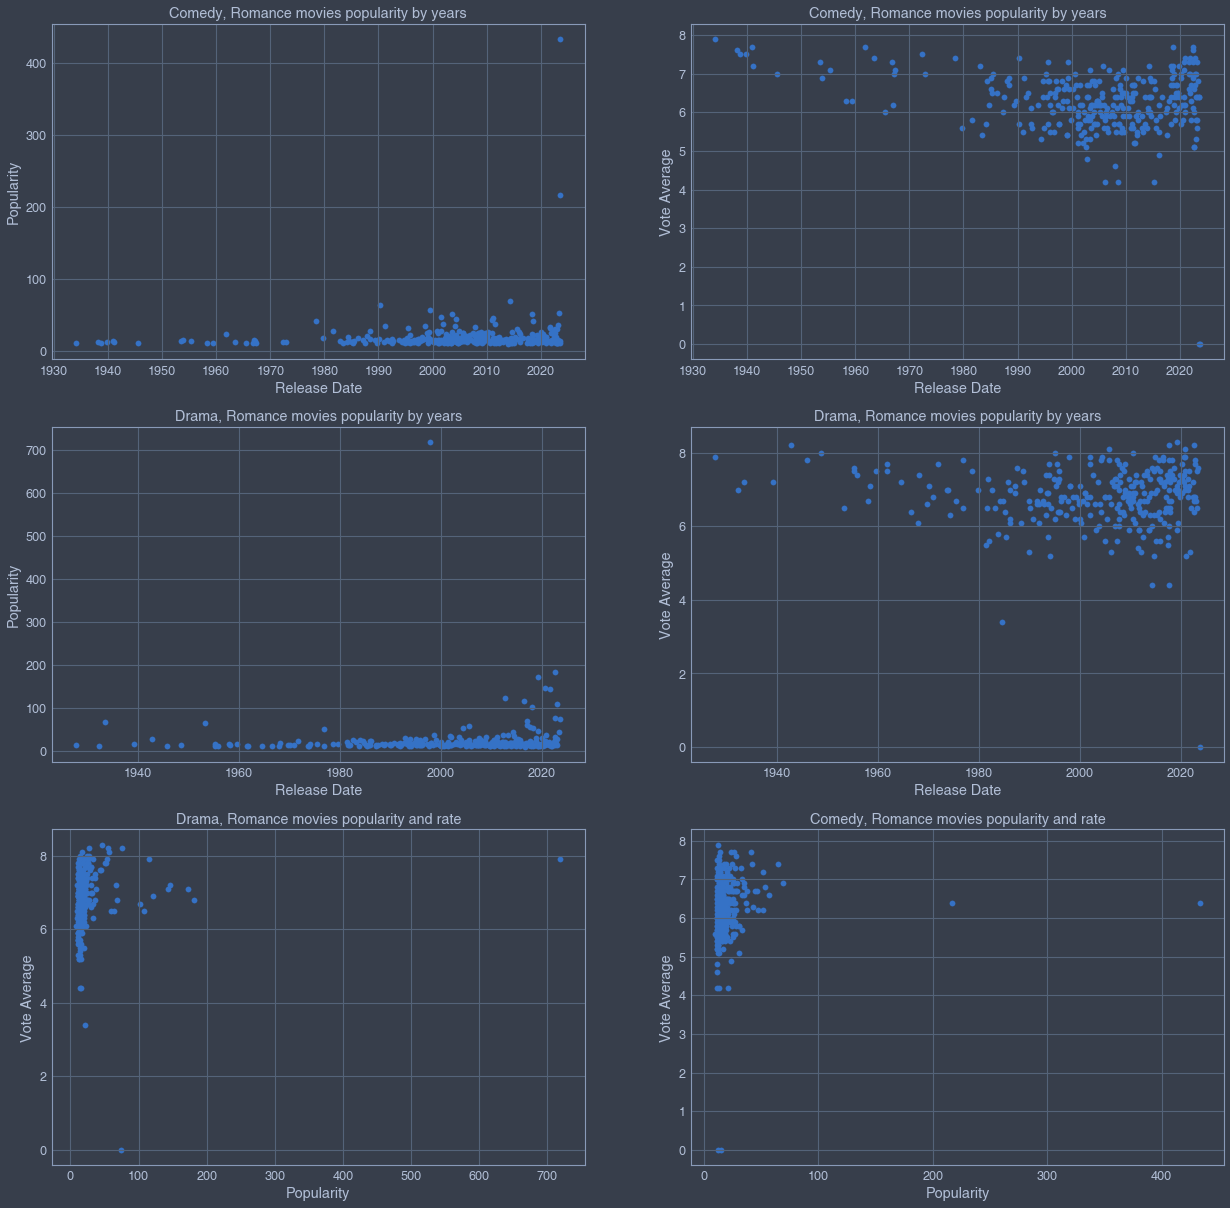

In [64]:
fig, axs = plt.subplots(3, 2, figsize=(21, 21))

axs[0, 0].scatter(comedy_romance['release_date'],
               comedy_romance['popularity'])
axs[0, 0].set_title('Comedy, Romance movies popularity by years')
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Popularity')

axs[1, 0].scatter(drama_romance['release_date'],
               drama_romance['popularity'])
axs[1, 0].set_title('Drama, Romance movies popularity by years')
axs[1, 0].set_xlabel('Release Date')
axs[1, 0].set_ylabel('Popularity')

axs[0, 1].scatter(comedy_romance['release_date'],
               comedy_romance['vote_average'])
axs[0, 1].set_title('Comedy, Romance movies popularity by years')
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Vote Average')

axs[1, 1].scatter(drama_romance['release_date'],
               drama_romance['vote_average'])
axs[1, 1].set_title('Drama, Romance movies popularity by years')
axs[1, 1].set_xlabel('Release Date')
axs[1, 1].set_ylabel('Vote Average')

axs[2, 0].scatter(drama_romance['popularity'],
               drama_romance['vote_average'])
axs[2, 0].set_title('Drama, Romance movies popularity and rate')
axs[2, 0].set_xlabel('Popularity')
axs[2, 0].set_ylabel('Vote Average')

axs[2, 1].scatter(comedy_romance['popularity'],
               comedy_romance['vote_average'])
axs[2, 1].set_title('Comedy, Romance movies popularity and rate')
axs[2, 1].set_xlabel('Popularity')
axs[2, 1].set_ylabel('Vote Average')

In [48]:
movies_by_years = date_index.resample('1Y').count()['id']

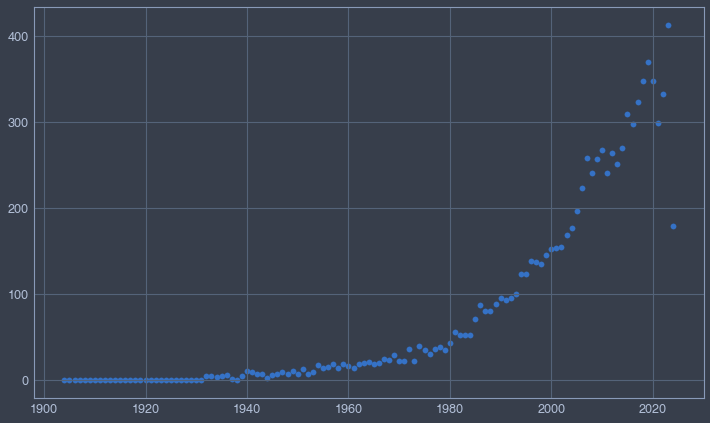

In [47]:
plt.scatter(movies_by_years.index, movies_by_years)

In [63]:
genres = date_index.groupby('genres').count()

In [66]:
genres_by_date.value_counts(['genres'])

genres                               
Drama                                    454
Comedy                                   394
Comedy, Romance                          239
Drama, Romance                           229
Horror, Thriller                         198
                                        ... 
Drama, Family, Fantasy, TV Movie           1
Drama, Family, Fantasy, Romance            1
Drama, Family, Fantasy, Adventure          1
Drama, Family, Comedy, Crime, Mystery      1
Drama, Crime, Documentary                  1
Length: 2238, dtype: int64

In [92]:
genres

,id,genre_ids,overview,popularity,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
Action,81,81,81,81,81,81,81,81,81,81
"Action, Adventure",17,17,17,17,17,17,17,17,17,17
"Action, Adventure, Animation",3,3,3,3,3,3,3,3,3,3
"Action, Adventure, Animation, Comedy",1,1,1,1,1,1,1,1,1,1
"Action, Adventure, Animation, Comedy, Family",4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
"Western, Mystery",1,1,1,1,1,1,1,1,1,1
"Western, Mystery, Thriller, Drama",1,1,1,1,1,1,1,1,1,1
"Western, Romance",2,2,2,2,2,2,2,2,2,2


In [59]:
corr_df = movies_df[['popularity', 'vote_average', 'vote_count']]

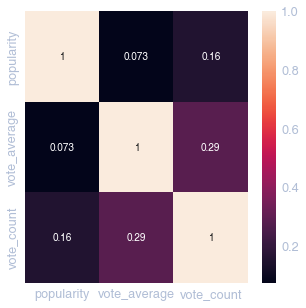

In [61]:
corr = corr_df.corr()
corr_features = corr.index
plt.figure(figsize=(5,5))
g = sns.heatmap(corr_df[corr_features].corr(), annot=True)

## Genres Labeling

In [24]:
exp_df = movies_df.copy()

In [25]:
exp_df['genres'].nunique()

2131

In [26]:
exp_df.drop(['genre_ids', 'overview', 'cast', 'crew', 'keywords'], axis=1, inplace=True)

In [27]:
exp_df

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller"
697843,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller"
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime"
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction"
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy"
...,...,...,...,...,...,...
15017,11.077,2007-12-21,Blonde Ambition,4.6,97,"Comedy, Romance"
79509,11.076,1990-03-22,The Ambulance,5.9,85,"Action, Thriller, Comedy"
13370,11.075,2003-04-16,A Mighty Wind,6.8,206,"Comedy, Music"


In [28]:
genres_map = {genre: idx+1 for idx, genre in enumerate(np.unique(exp_df['genres']))}
genres_map.update({'No Genre': 0})
invert_genres_map = {v : x for x, v in genres_map.items()}
exp_df['genres'] = exp_df['genres'].map(genres_map).astype(int)

In [29]:
exp_df

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,181
697843,2494.010,2023-06-09,Extraction 2,7.7,910,268
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,275
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,12
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,631
...,...,...,...,...,...,...
15017,11.077,2007-12-21,Blonde Ambition,4.6,97,875
79509,11.076,1990-03-22,The Ambulance,5.9,85,273
13370,11.075,2003-04-16,A Mighty Wind,6.8,206,861


In [30]:
invert_genres_map[181]

'Action, Crime, Thriller'

In [31]:
exp_df[exp_df['genres']==genres_map['Action, Crime, Thriller']]

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,181
1105803,165.036,2023-04-28,Snag,5.8,37,181
337339,89.552,2017-04-12,The Fate of the Furious,6.9,9560,181
1035806,67.419,2023-01-20,Detective Knight: Independence,5.5,126,181
615457,66.289,2021-03-18,Nobody,8.0,5958,181
...,...,...,...,...,...,...
26789,12.458,1986-12-19,No Mercy,5.8,142,181
21610,12.347,1981-03-17,Nighthawks,6.4,348,181
6,12.123,1993-10-15,Judgment Night,6.6,288,181


In [32]:
original_genres_data = exp_df['genres']
scaled_genres_data = minmax_scaling(original_genres_data.to_frame(), columns=['genres'])

Text(0.5, 1.0, 'Scaled Data')

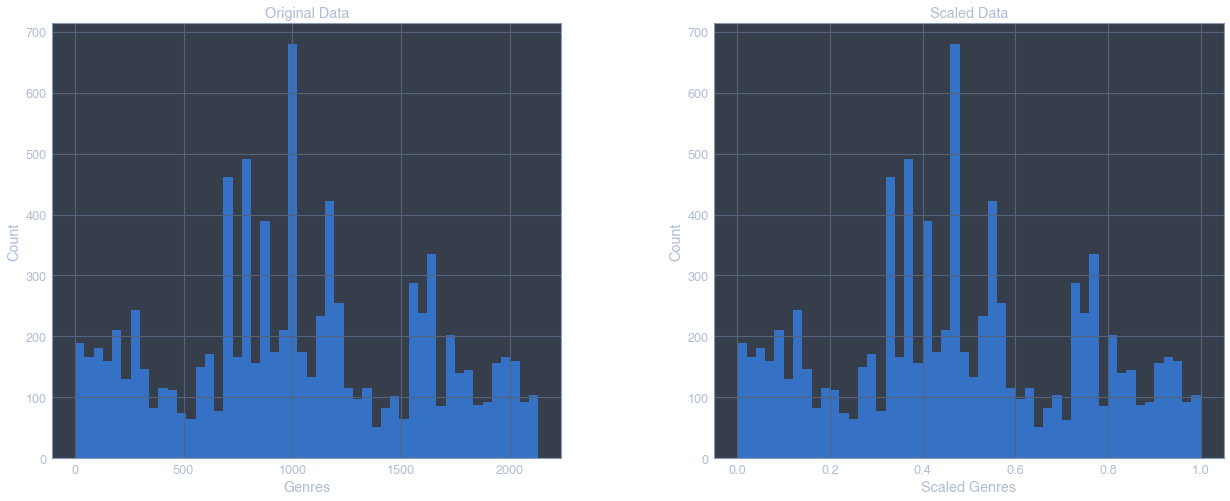

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(21, 8))

original_genres_data.hist(bins=50, ax=axs[0])
axs[0].set_xlabel('Genres')
axs[0].set_ylabel('Count')
axs[0].set_title('Original Data')

scaled_genres_data.hist(bins=50, ax=axs[1])
axs[1].set_xlabel('Scaled Genres')
axs[1].set_ylabel('Count')
axs[1].set_title('Scaled Data')

In [34]:
scaled_genres_data

,genres
id,
385687,0.084507
697843,0.125352
603692,0.128638
569094,0.005164
502356,0.295775
...,...
15017,0.410329
79509,0.127700
13370,0.403756


In [35]:
normalized_genres_data = stats.boxcox(original_genres_data)

In [36]:
normalized_genres_data = pd.DataFrame(normalized_genres_data[0], index=original_genres_data.index)

In [37]:
normalized_genres_data

,0
id,
385687,61.347820
697843,82.398297
603692,84.006211
569094,7.119079
502356,156.144893
...,...
15017,199.088315
79509,83.547915
13370,196.718038


Text(0.5, 1.0, 'Normalized Data')

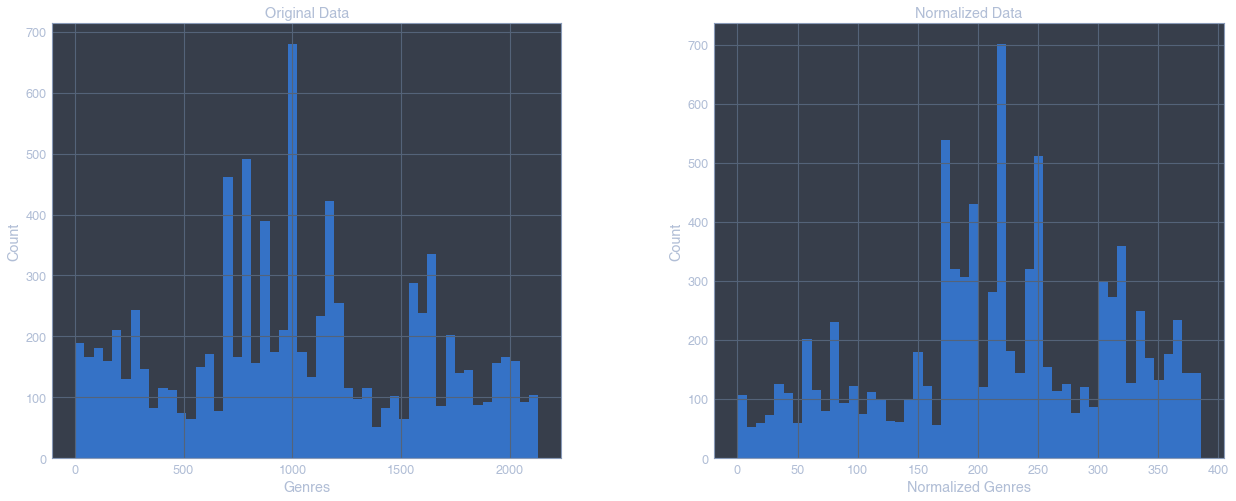

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(21, 8))

original_genres_data.hist(bins=50, ax=axs[0])
axs[0].set_xlabel('Genres')
axs[0].set_ylabel('Count')
axs[0].set_title('Original Data')

normalized_genres_data.hist(bins=50, ax=axs[1])
axs[1].set_xlabel('Normalized Genres')
axs[1].set_ylabel('Count')
axs[1].set_title('Normalized Data')

### Labeling all data

In [38]:
exp2_df = movies_df.copy()

In [39]:
exp2_df.drop(['genre_ids', 'overview', 'cast', 'crew', 'keywords'], axis=1, inplace=True)

In [40]:
exp2_df.head()

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller"
697843,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller"
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime"
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction"
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy"


In [41]:
LE = LabelEncoder()
exp2_df['genres'] = LE.fit_transform(exp2_df['genres'])

Text(0.5, 1.0, 'LabelEncoder Data')

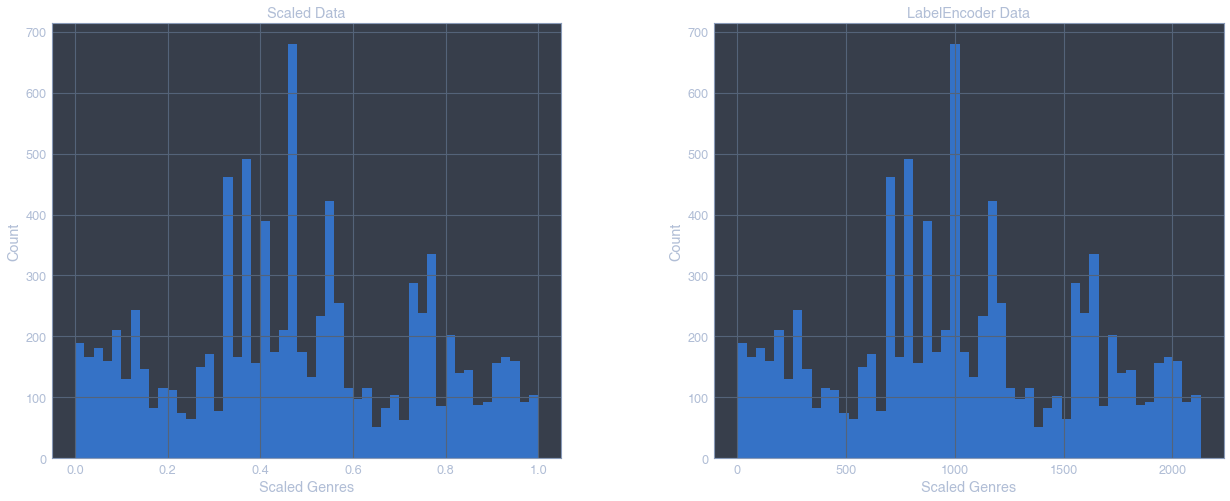

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(21, 8))

scaled_genres_data.hist(bins=50, ax=axs[0])
axs[0].set_xlabel('Scaled Genres')
axs[0].set_ylabel('Count')
axs[0].set_title('Scaled Data')

exp2_df['genres'].hist(bins=50, ax=axs[1])
axs[1].set_xlabel('Genres')
axs[1].set_ylabel('Count')
axs[1].set_title('LabelEncoder Data')

In [42]:
exp2_df.head()

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,180
697843,2494.010,2023-06-09,Extraction 2,7.7,910,267
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,274
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,11
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,630


In [43]:
exp2_df['release_date'] = LE.fit_transform(exp2_df['release_date'])

In [44]:
exp2_df.head()

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,5836,Fast X,7.3,2093,180
697843,2494.010,5847,Extraction 2,7.7,910,267
603692,1920.127,5810,John Wick: Chapter 4,7.9,3344,274
569094,2013.795,5843,Spider-Man: Across the Spider-Verse,8.6,1796,11
502356,1539.037,5818,The Super Mario Bros. Movie,7.8,5165,630


In [45]:
corr = exp2_df.drop('title', axis=1)

Text(0.5, 1.0, 'Correlation')

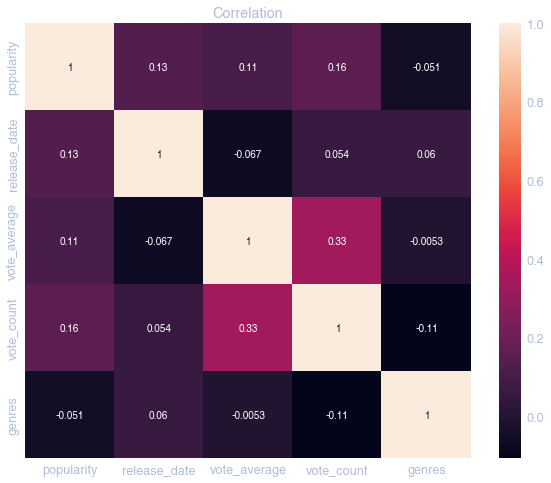

In [47]:
corr_matrix = corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation')

In [21]:
classes = movies_df.copy()

In [22]:
classes.drop(['genres', 'overview', 'title', 'cast', 'crew', 'keywords'], axis=1, inplace=True)
classes.head()

,genre_ids,popularity,release_date,vote_average,vote_count
id,,,,,
385687,"[28, 80, 53]",4654.279,2023-05-17,7.3,2093
697843,"[28, 53]",2494.010,2023-06-09,7.7,910
603692,"[28, 53, 80]",1920.127,2023-03-22,7.9,3344
569094,"[28, 12, 16, 878]",2013.795,2023-05-31,8.6,1796
502356,"[16, 10751, 12, 14, 35]",1539.037,2023-04-05,7.8,5165


In [23]:
classes.iloc[0]['genre_ids']

'[28, 80, 53]'

In [24]:
classes.dtypes

genre_ids               object
popularity             float64
release_date    datetime64[ns]
vote_average           float64
vote_count               int64
dtype: object

In [25]:
classes['genre_ids'].nunique()

2131

In [26]:
genres_list = list(movies_df['genres'].unique())

In [27]:
for i, g in enumerate(genres_list):
    genres_list[i] = g.split(', ')

In [28]:
genres_list[:20]

[['Action', 'Crime', 'Thriller'],
 ['Action', 'Thriller'],
 ['Action', 'Thriller', 'Crime'],
 ['Action', 'Adventure', 'Animation', 'Science Fiction'],
 ['Animation', 'Family', 'Adventure', 'Fantasy', 'Comedy'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Animation', 'Comedy', 'Family', 'Fantasy', 'Romance'],
 ['Mystery', 'Thriller', 'Science Fiction'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Action', 'Science Fiction', 'Adventure'],
 ['Science Fiction', 'Adventure', 'Action'],
 ['Action', 'Horror', 'Thriller'],
 ['Adventure', 'Family', 'Fantasy', 'Romance'],
 ['Thriller', 'Horror'],
 ['Horror', 'Thriller'],
 ['War', 'Action', 'Thriller'],
 ['Drama', 'Romance'],
 ['Action', 'Fantasy', 'Thriller'],
 ['Comedy', 'Action', 'Fantasy'],
 ['Comedy', 'Drama']]

In [29]:
un_genres_list = [genre for genres in genres_list for genre in genres]

In [30]:
len(genres_list), len(un_genres_list)

(2131, 7856)

In [31]:
un_genres_list = list(set(un_genres_list))

In [32]:
len(un_genres_list)

19

In [33]:
un_genres_list

['Action',
 'Romance',
 'Horror',
 'Music',
 'History',
 'Comedy',
 'Thriller',
 'Mystery',
 'Documentary',
 'Drama',
 'Western',
 'Science Fiction',
 'War',
 'TV Movie',
 'Crime',
 'Fantasy',
 'Animation',
 'Adventure',
 'Family']

In [34]:
genres_list[:20]

[['Action', 'Crime', 'Thriller'],
 ['Action', 'Thriller'],
 ['Action', 'Thriller', 'Crime'],
 ['Action', 'Adventure', 'Animation', 'Science Fiction'],
 ['Animation', 'Family', 'Adventure', 'Fantasy', 'Comedy'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Animation', 'Comedy', 'Family', 'Fantasy', 'Romance'],
 ['Mystery', 'Thriller', 'Science Fiction'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Action', 'Science Fiction', 'Adventure'],
 ['Science Fiction', 'Adventure', 'Action'],
 ['Action', 'Horror', 'Thriller'],
 ['Adventure', 'Family', 'Fantasy', 'Romance'],
 ['Thriller', 'Horror'],
 ['Horror', 'Thriller'],
 ['War', 'Action', 'Thriller'],
 ['Drama', 'Romance'],
 ['Action', 'Fantasy', 'Thriller'],
 ['Comedy', 'Action', 'Fantasy'],
 ['Comedy', 'Drama']]

In [35]:
genres_counter = {}
l = []
for g in un_genres_list:
    for gs in genres_list:
        if g in gs:
            l.extend(gs)
    genres_counter[g] = dict(Counter(l))
    l = []

genres_counter['Animation']

{'Action': 129,
 'Adventure': 216,
 'Animation': 407,
 'Science Fiction': 99,
 'Family': 298,
 'Fantasy': 160,
 'Comedy': 215,
 'Romance': 26,
 'Music': 38,
 'Drama': 31,
 'TV Movie': 36,
 'Crime': 14,
 'Thriller': 12,
 'Horror': 18,
 'Mystery': 40,
 'Western': 7,
 'War': 5,
 'History': 4}

In [36]:
genres_df = pd.DataFrame(columns=un_genres_list, index=un_genres_list)
genres_df.head()

,Action,Romance,Horror,Music,History,Comedy,Thriller,Mystery,Documentary,Drama,Western,Science Fiction,War,TV Movie,Crime,Fantasy,Animation,Adventure,Family
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
for genre in un_genres_list:
    g = {}
    for u_genre in un_genres_list:
        if u_genre in genres_counter[genre].keys():
            g[u_genre] =  genres_counter[genre][u_genre]
        else:
            g[u_genre] = 0
    genres_df.loc[genre] = g

In [38]:
genres_df

,Action,Romance,Horror,Music,History,Comedy,Thriller,Mystery,Documentary,Drama,Western,Science Fiction,War,TV Movie,Crime,Fantasy,Animation,Adventure,Family
Action,759,52,115,8,50,210,264,73,5,208,38,234,66,38,153,152,129,348,137
Romance,52,359,17,43,23,149,72,36,0,194,20,35,26,22,39,80,26,82,76
Horror,115,17,343,7,3,77,159,84,2,79,7,104,6,20,36,104,18,54,14
Music,8,43,7,156,8,92,4,5,3,58,1,7,3,23,9,48,38,34,70
History,50,23,3,8,156,10,38,9,4,125,5,0,56,10,19,1,4,37,9
Comedy,210,149,77,92,10,786,98,85,5,175,24,127,14,79,116,241,215,301,352
Thriller,264,72,159,4,38,98,615,196,1,285,19,154,38,25,197,73,12,111,8
Mystery,73,36,84,5,9,85,196,342,3,141,6,72,6,12,98,52,40,59,41
Documentary,5,0,2,3,4,5,1,3,29,7,0,1,0,3,3,0,0,3,1
Drama,208,194,79,58,125,175,285,141,7,797,51,96,97,55,166,117,31,164,109


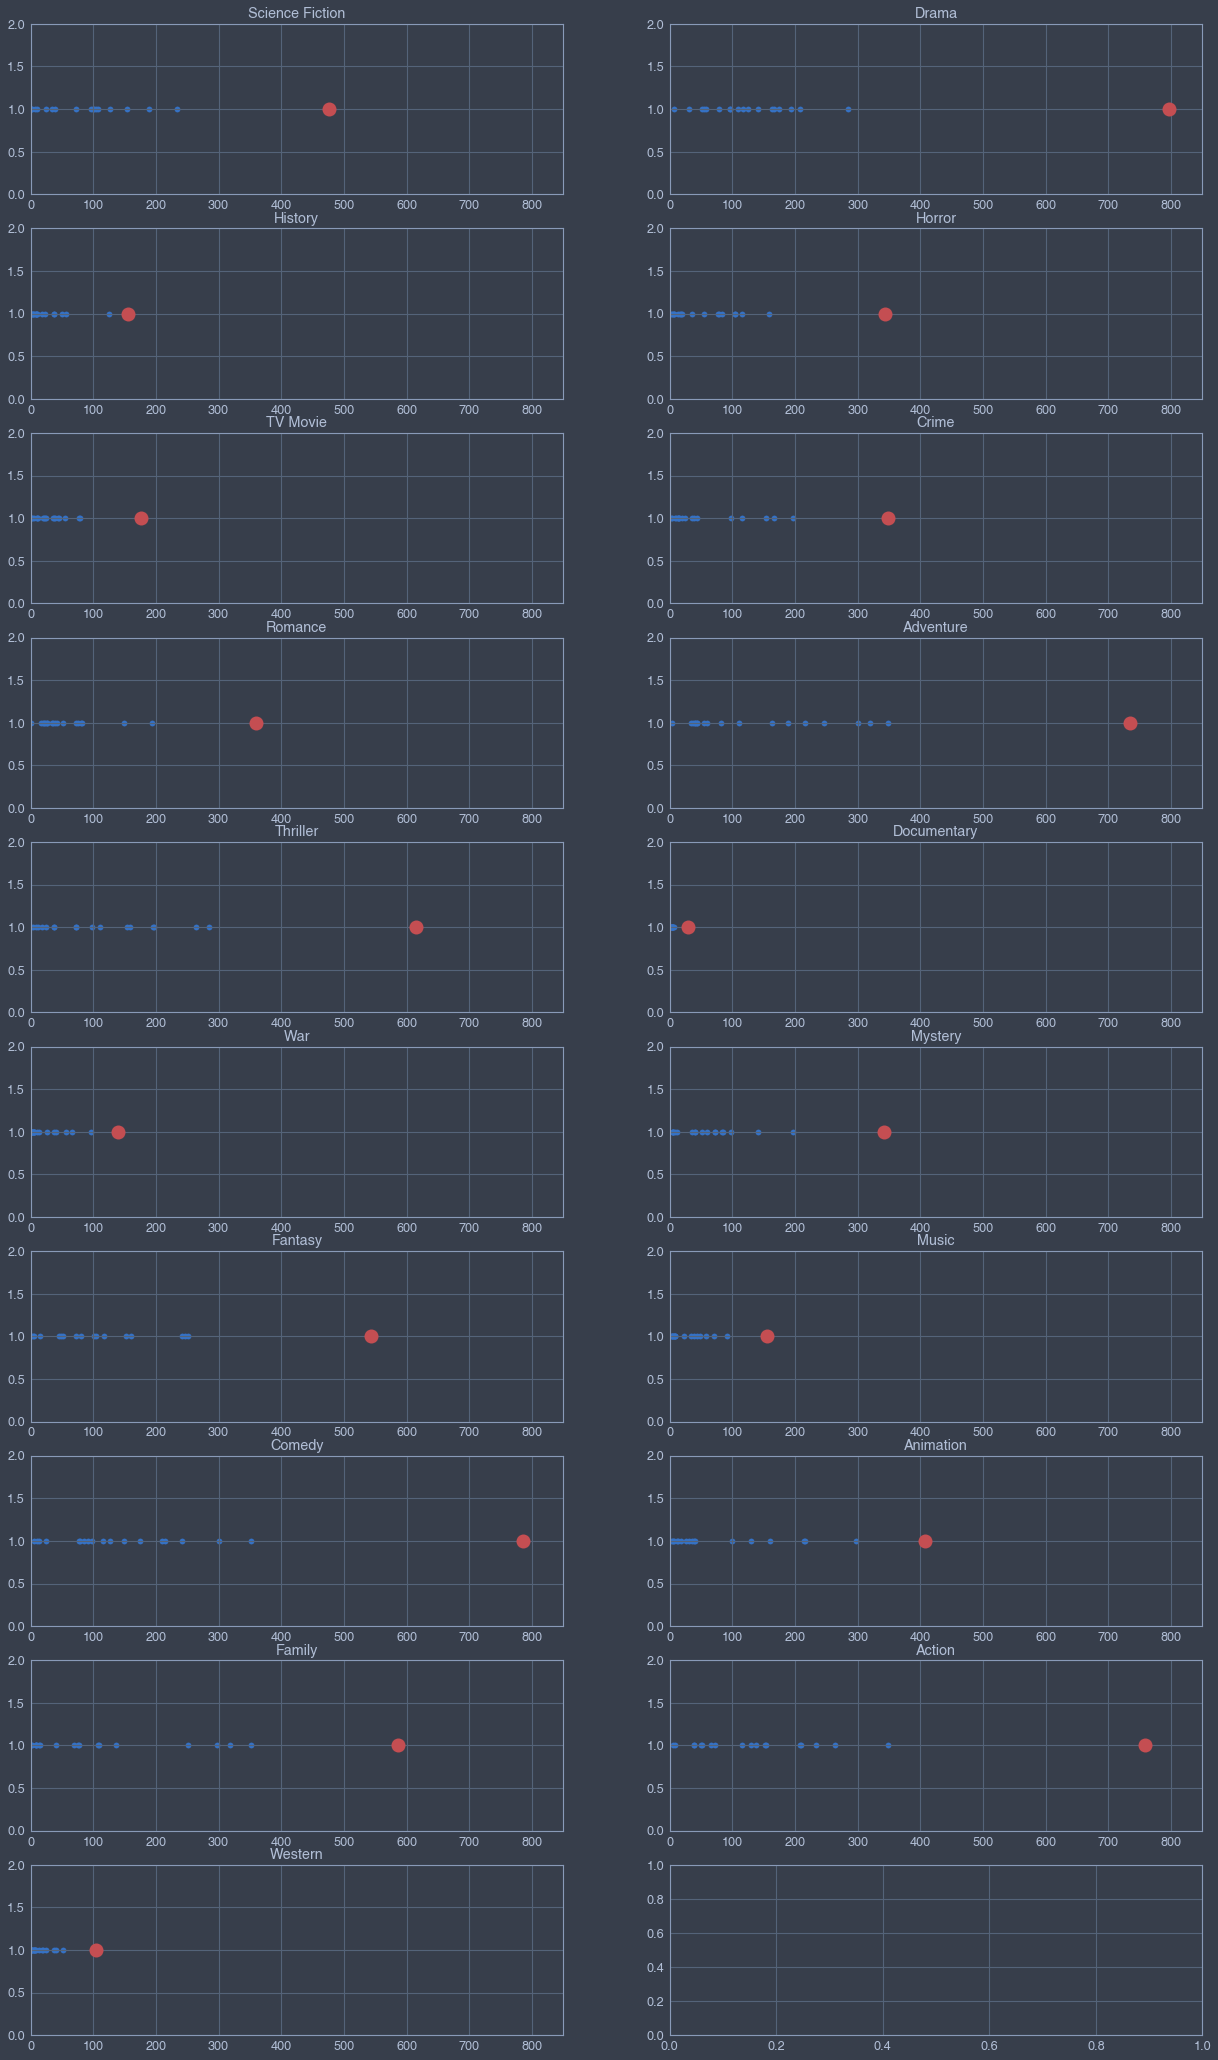

In [108]:
y = np.full(genres_df['Fantasy'].shape[0], 1)
fig, axs = plt.subplots(10, 2, figsize=(21, 37))

# this is a sample of absolutely shitty code
a = [a for a in range(10)]*2
b = [0]*10+[1]*9

for n, i in enumerate(genres_df.columns):        
    axs[a[n], b[n]].scatter(genres_df[i], y)
    axs[a[n], b[n]].plot(genres_df[i][i], 1, 'ro', markersize=14)

    axs[a[n], b[n]].set_title(i)
    axs[a[n], b[n]].set_ylim(0, 2)
    axs[a[n], b[n]].set_xlim(0, 850)
    


In [88]:
np.full(genres_df['Fantasy'].shape[0], 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, '')

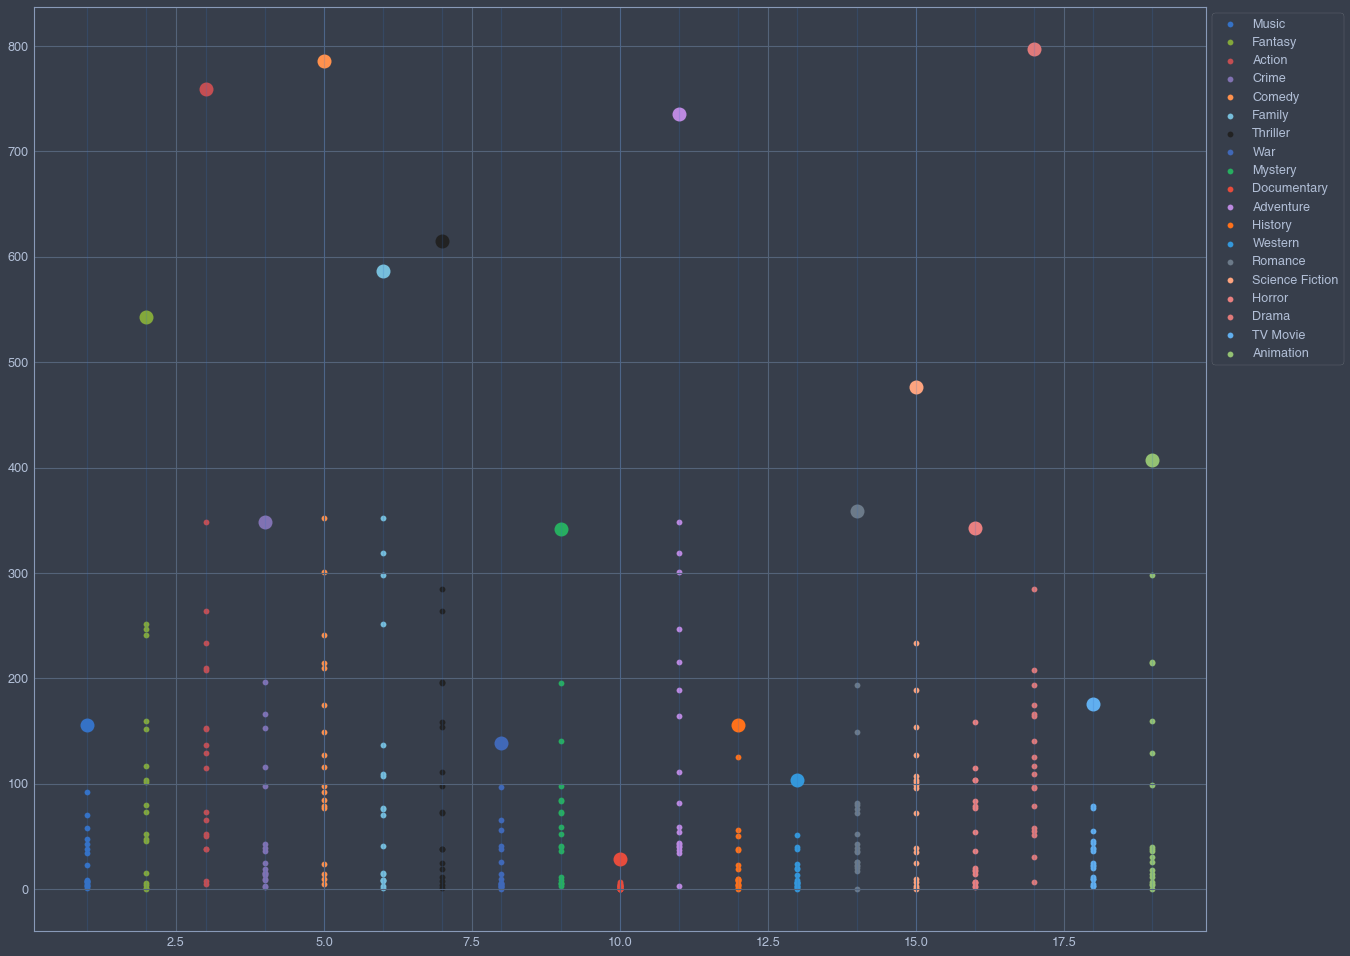

In [107]:
y = np.full(genres_df['Fantasy'].shape[0], 1)
fig, axs = plt.subplots(1, 1, figsize=(21, 17))

for n, i in enumerate(genres_df.columns):        
    axs.scatter(np.full(genres_df['Fantasy'].shape[0], n+1), genres_df[i], label=i)
    axs.plot(n+1, genres_df[i][i], 'o', markersize=14)
    axs.axvline(n+1, alpha=0.2)

axs.legend(bbox_to_anchor=(1.0, 1.0))
axs.set_title('')


In [45]:
genres_df['Action']

Action             759
Romance             52
Horror             115
Music                8
History             50
Comedy             210
Thriller           264
Mystery             73
Documentary          5
Drama              208
Western             38
Science Fiction    234
War                 66
TV Movie            38
Crime              153
Fantasy            152
Animation          129
Adventure          348
Family             137
Name: Action, dtype: object

In [62]:
def get_cosine_similarity_mertric(df1, df2):
    return np.dot(df1, df2)/ \
    (np.sqrt(np.power(df1, 2).sum()) * np.sqrt(np.power(df2, 2).sum()))

In [53]:
np.dot(genres_df['Action'], genres_df['Drama'])/ \
(np.sqrt(np.power(genres_df['Action'], 2).sum()) * np.sqrt(np.power(genres_df['Drama'], 2).sum()))

0.623966869436885

In [63]:
cs_df = pd.DataFrame(columns=genres_df.index, index=genres_df.index)
cs_df.head()

,Action,Romance,Horror,Music,History,Comedy,Thriller,Mystery,Documentary,Drama,Western,Science Fiction,War,TV Movie,Crime,Fantasy,Animation,Adventure,Family
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
cs_df.loc['Action']['Action']

nan

In [64]:
for i in genres_df.columns:
    for j in genres_df.columns:
        cs_df.loc[i][j] = get_cosine_similarity_mertric(genres_df[i], genres_df[j])

In [65]:
cs_df

,Action,Romance,Horror,Music,History,Comedy,Thriller,Mystery,Documentary,Drama,Western,Science Fiction,War,TV Movie,Crime,Fantasy,Animation,Adventure,Family
Action,1.0,0.473524,0.612385,0.364484,0.479258,0.641312,0.717784,0.554684,0.291962,0.623967,0.555539,0.781199,0.573059,0.513236,0.650536,0.625936,0.589238,0.797106,0.571553
Romance,0.473524,1.0,0.373366,0.59703,0.473519,0.641448,0.495854,0.471931,0.221919,0.725442,0.498564,0.428716,0.486483,0.495483,0.481107,0.550375,0.421453,0.530338,0.521147
Horror,0.612385,0.373366,1.0,0.281107,0.285758,0.46611,0.717057,0.646352,0.220365,0.516213,0.347704,0.641385,0.335557,0.410583,0.507797,0.54539,0.339585,0.464983,0.334294
Music,0.364484,0.59703,0.281107,1.0,0.303492,0.711368,0.26195,0.314863,0.257017,0.497333,0.319886,0.354121,0.277159,0.580721,0.310511,0.609684,0.590689,0.530574,0.677975
History,0.479258,0.473519,0.285758,0.303492,1.0,0.298909,0.504018,0.384377,0.312933,0.748685,0.433182,0.295121,0.799357,0.332524,0.462907,0.259801,0.19883,0.386237,0.244276
Comedy,0.641312,0.641448,0.46611,0.711368,0.298909,1.0,0.440748,0.491783,0.274301,0.542533,0.455509,0.601664,0.334201,0.677208,0.503363,0.781311,0.789651,0.784823,0.857971
Thriller,0.717784,0.495854,0.717057,0.26195,0.504018,0.440748,1.0,0.803086,0.252943,0.747659,0.468874,0.632004,0.527351,0.394733,0.803562,0.419476,0.276127,0.478655,0.280956
Mystery,0.554684,0.471931,0.646352,0.314863,0.384377,0.491783,0.803086,1.0,0.263122,0.662259,0.387748,0.554591,0.379926,0.39673,0.702164,0.449878,0.365163,0.456686,0.36879
Documentary,0.291962,0.221919,0.220365,0.257017,0.312933,0.274301,0.252943,0.263122,1.0,0.337446,0.214639,0.216827,0.240606,0.273702,0.289151,0.192158,0.169529,0.247916,0.198267
Drama,0.623967,0.725442,0.516213,0.497333,0.748685,0.542533,0.747659,0.662259,0.337446,1.0,0.603654,0.512783,0.706889,0.511371,0.70113,0.496137,0.351065,0.537524,0.432878


In [68]:
cs_df = cs_df.astype(float)

Text(0.5, 1.0, 'Correlation')

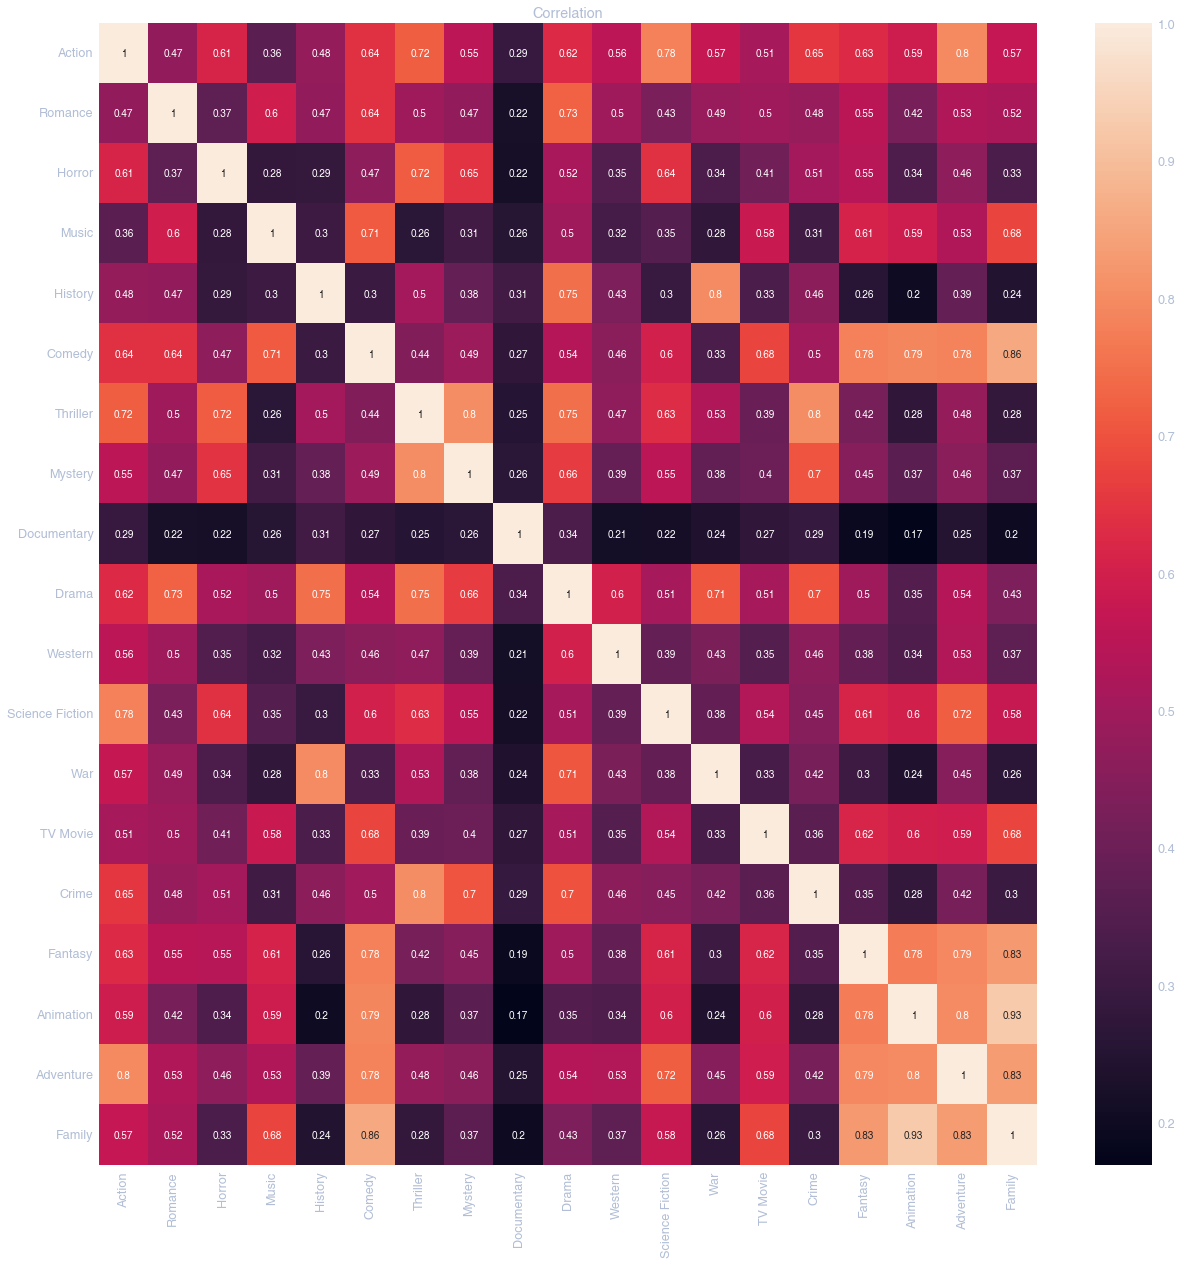

In [69]:
plt.figure(figsize=(21, 21))
sns.heatmap(cs_df, annot=True)
plt.title('Correlation')

Text(0.5, 1.0, '')

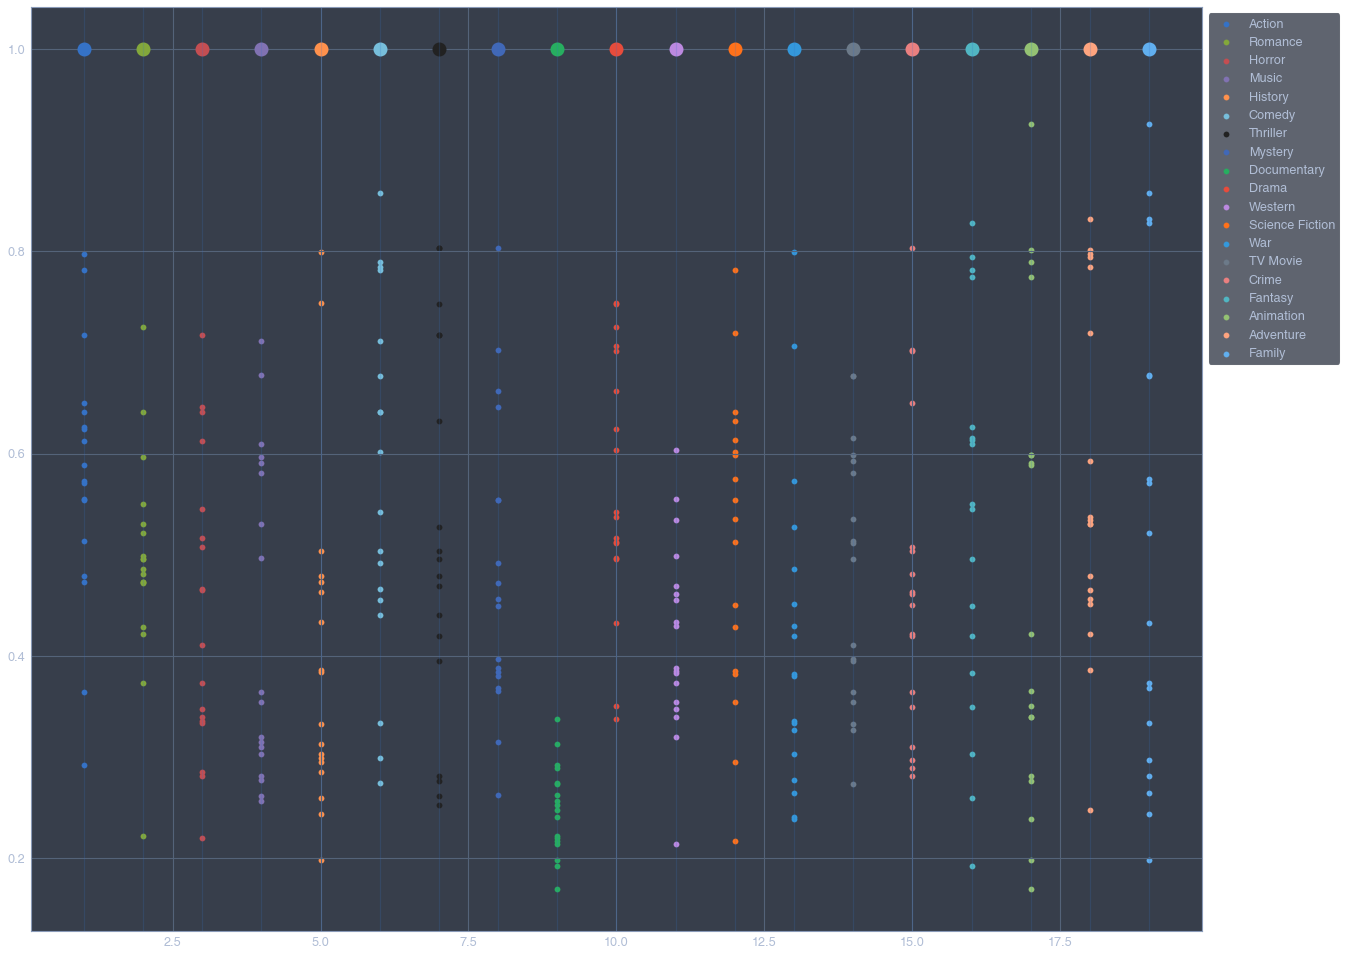

In [70]:
y = np.full(cs_df['Fantasy'].shape[0], 1)
fig, axs = plt.subplots(1, 1, figsize=(21, 17))

for n, i in enumerate(cs_df.columns):        
    axs.scatter(np.full(cs_df['Fantasy'].shape[0], n+1), cs_df[i], label=i)
    axs.plot(n+1, cs_df[i][i], 'o', markersize=14)
    axs.axvline(n+1, alpha=0.2)

axs.legend(bbox_to_anchor=(1.0, 1.0))
axs.set_title('')

### Modeling how it should work

In [34]:
choice = movies_df[movies_df['title'].isin(['Alien', 'Aliens'])]
choice

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
348,"[27, 878]","During its return to the earth, commercial spa...",62.215,1979-05-25,Alien,8.1,12914,"Horror, Science Fiction","[{'cast_id': 10205, 'name': 'Sigourney Weaver'...","[{'crew_id': 578, 'name': 'Ridley Scott', 'dep...","[{'id': 803, 'name': 'android'}, {'id': 1612, ..."
679,"[28, 53, 878]",When Ripley's lifepod is found by a salvage cr...,59.005,1986-07-18,Aliens,7.9,8542,"Action, Thriller, Science Fiction","[{'cast_id': 10205, 'name': 'Sigourney Weaver'...","[{'crew_id': 8380, 'name': 'Michael Lamont', '...","[{'id': 803, 'name': 'android'}, {'id': 1603, ..."


In [36]:
genres_df['Science Fiction']['Horror'],\
genres_df['Science Fiction']['Action'],\
genres_df['Science Fiction']['Thriller']

(104, 234, 154)

In [37]:
genres_df[genres_df['Science Fiction']>0.4]['Science Fiction']

Science Fiction    476
TV Movie            39
Romance             35
Thriller           154
War                 10
Fantasy            102
Comedy             127
Family             107
Western              3
Drama               96
Horror             104
Crime               25
Adventure          189
Documentary          1
Mystery             72
Music                7
Animation           99
Action             234
Name: Science Fiction, dtype: object

In [38]:
genres_df['Science Fiction'].sort_values(ascending=False)[1:]

Action         234
Adventure      189
Thriller       154
Comedy         127
Family         107
Horror         104
Fantasy        102
Animation       99
Drama           96
Mystery         72
TV Movie        39
Romance         35
Crime           25
War             10
Music            7
Western          3
Documentary      1
History          0
Name: Science Fiction, dtype: object

In [39]:
genres_df['Action'].sort_values(ascending=False)[1:]

Adventure          348
Thriller           264
Science Fiction    234
Comedy             210
Drama              208
Crime              153
Fantasy            152
Family             137
Animation          129
Horror             115
Mystery             73
War                 66
Romance             52
History             50
TV Movie            38
Western             38
Music                8
Documentary          5
Name: Action, dtype: object

In [40]:
genres_df['Horror'].sort_values(ascending=False)[1:]

Thriller           159
Action             115
Fantasy            104
Science Fiction    104
Mystery             84
Drama               79
Comedy              77
Adventure           54
Crime               36
TV Movie            20
Animation           18
Romance             17
Family              14
Music                7
Western              7
War                  6
History              3
Documentary          2
Name: Horror, dtype: object

In [41]:
genres_df['Thriller'].sort_values(ascending=False)[1:]

Drama              285
Action             264
Crime              197
Mystery            196
Horror             159
Science Fiction    154
Adventure          111
Comedy              98
Fantasy             73
Romance             72
History             38
War                 38
TV Movie            25
Western             19
Animation           12
Family               8
Music                4
Documentary          1
Name: Thriller, dtype: object

In [90]:
main_target = movies_df[movies_df['title']=='Alien³']
main_target

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
8077,"[878, 28, 27]",After escaping with Newt and Hicks from the al...,24.109,1992-05-22,Alien³,6.4,4943,"Science Fiction, Action, Horror","[{'cast_id': 10205, 'name': 'Sigourney Weaver'...","[{'crew_id': 1113, 'name': 'Lucinda Syson', 'd...","[{'id': 378, 'name': 'prison'}, {'id': 803, 'n..."


In [73]:
choice['genres']

id
348              Horror, Science Fiction
679    Action, Thriller, Science Fiction
Name: genres, dtype: object

In [67]:
def gather_genres(genres_list: pd.core.series.Series) -> list:
    return genres_list.to_list()

In [70]:
cnt = Counter(choice['genres'].to_list())
dict(cnt)

{'Horror, Science Fiction': 1, 'Action, Thriller, Science Fiction': 1}

In [80]:
choice['genres'].to_list()

['Horror, Science Fiction', 'Action, Thriller, Science Fiction']

In [82]:
l = [g.split(', ') for i in choice['genres'].to_list()]
l

[['Action', 'Thriller', 'Science Fiction'],
 ['Action', 'Thriller', 'Science Fiction']]

In [ ]:
flaten_list = [item for list_in_list in main_list for item in list_in_list]

In [65]:
choice

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
348,"[27, 878]","During its return to the earth, commercial spa...",62.215,1979-05-25,Alien,8.1,12914,"Horror, Science Fiction","[{'cast_id': 10205, 'name': 'Sigourney Weaver'...","[{'crew_id': 578, 'name': 'Ridley Scott', 'dep...","[{'id': 803, 'name': 'android'}, {'id': 1612, ..."
679,"[28, 53, 878]",When Ripley's lifepod is found by a salvage cr...,59.005,1986-07-18,Aliens,7.9,8542,"Action, Thriller, Science Fiction","[{'cast_id': 10205, 'name': 'Sigourney Weaver'...","[{'crew_id': 8380, 'name': 'Michael Lamont', '...","[{'id': 803, 'name': 'android'}, {'id': 1603, ..."
